## Class for poseData

In [151]:
import cv2

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

nPoints = 18

KEYPOINTS = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16]]


class poseData():
    """
    """
    
    def __init__(self):
        self.POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
                          [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
                          [1,0], [0,14], [14,16], [0,15], [15,17],
                          [2,17], [5,16]]
        self.KEYPOINTS =  ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                            'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                            'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']
        self.WindowH = 640
        self.WindowW = 360
    
    def dict_to_intDict(self, dict_posePoint):
        return {int(k): v for k, v in dict_posePoint.items()}
        
    def plotSinglePose(self, posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((self.WindowW, self.WindowH))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        
        for pair in self.POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                plt.plot(xs, ys,'ko-', linewidth=4)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
    
    def plotSinglePose2(self, posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((self.WindowW, self.WindowH))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        xs = []
        ys = []
        
        for pair in self.POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs.append([posePoint[pair[0]][0], posePoint[pair[1]][0]])
                ys.append([posePoint[pair[0]][1], posePoint[pair[1]][1]])
            
        plt.plot(xs, ys,'ko-', linewidth=4)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
        
    def savePoseSequence(self, posePointsDict): ## PosePointsDict is a dictionary w. int point
        fourcc = cv2.VideoWriter_fourcc(*'AVC1')
        out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
        
        for person in posePointsDict:
            for pair in self.POSE_PAIRS:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (person[pair[0]][0] != -1)
                valid_pt2 = (person[pair[1]][0] != -1)
                if valid_pt1 and valid_pt2:
                    xs = [person[pair[0]][0], person[pair[1]][0]]
                    ys = [person[pair[0]][1], person[pair[1]][1]]
                    plt.plot(xs, ys,'ko-')
        

        
def getPoseLines(file):
    #count = 1
    with open(frameDir + file, "r") as f:
        for line in f:
            yield json.loads(line)
            """
            try:
                yield json.loads(line)
            except:
                print(f"Cant read JSON line {count}, {file}")
            count += 1
            """


def dict_to_intDict(dict_posePoint):
        return {int(k): v for k, v in dict_posePoint.items()}

def getFlattenedPose(poseDict):
    
    flat = []
    
    #--- Check if keys are int. If string, turn the keys to int
    if type(list(poseDict.keys())[0]) == str:
        poseDict = dict_to_intDict(poseDict)
    
    #--- Get coords of key points
    for keypoint in range(0, 18):
        flat.append(poseDict[keypoint])
    
    #--- Convert to numpy array and then flatten the coords list
    flat = np.array(flat).flatten()
    return flat

'''
def getFlattenedPose_str(strPoseDict):
    intPoseDict = dict_to_intDict(strPoseDict)
    flat = []
    
    for keypoint in range(0, 18):
        flat.append(intDict[keypoint])
    
    flat = np.array(flat).flatten()
    return flat
'''

def getValidHeight(poseDict):
    """
    Assumes the pose is upright
    
    valid height = Nose to R-Knee, Nose to L-Knee, Neck to R-Knee, Nect to L-Knee in y coords
    Retrun person valid height
    
    """
    
    if type(list(poseDict.keys())[0]) == str:
        poseDict = dict_to_intDict(poseDict)
    
    nose_y = poseDict[KEYPOINTS.index('Nose')][1]
    neck_y = poseDict[KEYPOINTS.index('Neck')][1]
    rknee_y = poseDict[KEYPOINTS.index('R-Knee')][1]
    lknee_y = poseDict[KEYPOINTS.index('L-Knee')][1]
    
    h1, h2, h3, h4 = (-1, -1, -1, -1)
    
    if nose_y >0:
        if rknee_y >0:
            h1 = abs(nose_y - rknee_y)
            
        if lknee_y >0:
            h2 = abs(nose_y - lknee_y)
            
    if neck_y >0:
        if rknee_y >0:
            h3 = abs(neck_y - rknee_y)
            
        if lknee_y >0:
            h4 = abs(neck_y - lknee_y)
    
    return [h1, h2, h3, h4]

def getOnePose(multi_person):
    """
    multi_person should be a dictionary of person poses
    {"person0": pose0,
     "person1": pose1,
     "person2": pose2
    }
    
    returns one person pose with largest height:
    {"personMax": poseMax}
    """
    hts = []
    persons = []
    for person, pose in multi_person.items():
        persons.append(person)
        hts.append(getValidHeight(pose))
    
    hts = np.array(hts)
    
    maxHtIdx = []
    for i in range(hts.shape[1]):
        maxHtIdx.append(np.argmax(hts[:,i]))
    # get the most frequent index
    freqIdx = (max(map(lambda val: (maxHtIdx.count(val), val), set(maxHtIdx)))[1])
    
    maxHtPerson = persons[freqIdx]
    pose = {maxHtPerson: multi_person[maxHtPerson]}
    
    return pose

frameDir = "../data/frames/"
frameFiles = ["4nHElVbT3HY_1.json", "4nHElVbT3HY_1_aws.json", "4nHElVbT3HY_2_aws.json", \
         "ITNiqNcl6Mw_1_aws.json", "ITNiqNcl6Mw_2_aws.json", "M_rPhEjym1o_1_aws.json", "M_rPhEjym1o_2_aws.json", \
         "L5mqL7ADEsY_1_aws.json"]


### To assemble data for the model

In [128]:
#### FOR Testing Code
temp = {"person0": {"0": [222, 112], "1": [228, 136], "2": [205, 136], "3": [199, 169],
                    "4": [206, 198], "5": [247, 137], "6": [253, 175], "7": [245, 184], "8": [214, 200],
                    "9": [207, 254], "10": [213, 301], "11": [238, 206], "12": [236, 254], "13": [214, 292],
                    "14": [221, 105], "15": [229, 105], "16": [214, 107], "17": [237, 106]}}

temp_multi = {"person0": {"0": [379, 136], "1": [378, 152], "2": [361, 152],
                            "3": [347, 176], "4": [347, 207], "5": [394, 152],
                            "6": [400, 176], "7": [394, 183], "8": [362, 198],
                            "9": [353, 237], "10": [369, 263], "11": [385, 199],
                            "12": [378, 239], "13": [362, 284], "14": [378, 129],
                            "15": [386, 129], "16": [370, 129], "17": [387, 129]},
                "person1": {"0": [-1, -1], "1": [626, 152], "2": [612, 152],
                            "3": [611, 168], "4": [620, 175], "5": [637, 151], 
                            "6": [637, 167], "7": [-1, -1], "8": [612, 176], 
                            "9": [621, 190], "10": [612, 216], "11": [629, 176], 
                            "12": [637, 191], "13": [637, 215], "14": [-1, -1], 
                            "15": [-1, -1], "16": [-1, -1], "17": [-1, -1]}
               }

temp2_multi = {"person0": {"0": [377, 129], "1": [370, 152], "2": [354, 152], "3": [339, 182], "4": [362, 198], "5": [385, 152], "6": [386, 183], "7": [378, 168], "8": [354, 199], "9": [354, 238], "10": [331, 277], "11": [370, 199], "12": [385, 232], "13": [354, 255], "14": [370, 128], "15": [378, 128], "16": [362, 130], "17": [-1, -1]}, "person1": {"0": [527, 143], "1": [534, 151], "2": [520, 152], "3": [518, 160], "4": [-1, -1], "5": [542, 151], "6": [550, 160], "7": [550, 175], "8": [526, 168], "9": [526, 176], "10": [526, 192], "11": [541, 168], "12": [-1, -1], "13": [-1, -1], "14": [526, 137], "15": [528, 137], "16": [-1, -1], "17": [534, 137]}, "person3": {"0": [596, 135], "1": [596, 144], "2": [588, 144], "3": [-1, -1], "4": [-1, -1], "5": [604, 144], "6": [604, 152], "7": [597, 153], "8": [589, 160], "9": [567, 176], "10": [573, 192], "11": [597, 160], "12": [598, 169], "13": [-1, -1], "14": [596, 130], "15": [597, 130], "16": [-1, -1], "17": [-1, -1]}}
salsaPoseData = [] #This will become dancers X poses(or frames) X 36
count1 = 0
count2 = 0

fps = 24
fps_analysis = 8
fps_step = 3 #for frame differences/steps

seq_info = {}

pose_data_by_dancer = []
for file in frameFiles:
    #lineitems = getLines(file)
    prev_frame = 0
    dancer = []
    for line in getPoseLines(file):
        frame_no = line["frame_no"]
        
        #Step1: If time between consective successful frames > 2 secs that is 48
        if prev_frame == 0 or (frame_no - prev_frame)>48:
            # Begin new dancer, but first save previous dancer info if valid
            if len(dancer)>0:
                pose_data_by_dancer.append(dancer)
                
            dancer = []
        
        #Step2: if multi-person frame, get one person
        if line["person_count"] >1:
            dancer_pose = getOnePose(line["pers_coords"])
        else:
            dancer_pose = line["pers_coords"]
        
        #Step3: Flatten the pose
        pose_coords = list(dancer_pose.values())[0]
        
        #Step4: Add pose to dancer
        dancer.append(getFlattenedPose(pose_coords))
        
        #reset
        prev_frame = frame_no
        
print(len(pose_data_by_dancer))
for i in range(len(pose_data_by_dancer)):
    poses = len(pose_data_by_dancer[i])
    if poses>60
    print(f"Sequence {i+1} has {poses} frames")
"""
#To look at a random sequence of dance
p = np.random.randint(0, len(pose_data_by_dancer)) 
print(pose_data_by_dancer[p])
"""
#print(getFlattenedPose(dict_to_intDict(temp["person0"])))

72
Sequence 1 has 749 frames
Sequence 2 has 690 frames
Sequence 3 has 653 frames
Sequence 4 has 1003 frames
Sequence 5 has 854 frames
Sequence 6 has 629 frames
Sequence 7 has 575 frames
Sequence 8 has 809 frames
Sequence 9 has 22 frames
Sequence 10 has 766 frames
Sequence 11 has 1 frames
Sequence 12 has 619 frames
Sequence 13 has 47 frames
Sequence 14 has 699 frames
Sequence 15 has 78 frames
Sequence 16 has 566 frames
Sequence 17 has 907 frames
Sequence 18 has 43 frames
Sequence 19 has 681 frames
Sequence 20 has 112 frames
Sequence 21 has 465 frames
Sequence 22 has 200 frames
Sequence 23 has 164 frames
Sequence 24 has 509 frames
Sequence 25 has 1 frames
Sequence 26 has 642 frames
Sequence 27 has 664 frames
Sequence 28 has 668 frames
Sequence 29 has 887 frames
Sequence 30 has 809 frames
Sequence 31 has 1080 frames
Sequence 32 has 666 frames
Sequence 33 has 657 frames
Sequence 34 has 819 frames
Sequence 35 has 663 frames
Sequence 36 has 728 frames
Sequence 37 has 885 frames
Sequence 38 h

'\n#To look at a random sequence of dance\np = np.random.randint(0, len(pose_data_by_dancer)) \nprint(pose_data_by_dancer[p])\n'

In [131]:
from joblib import load, dump
dump(pose_data_by_dancer, "../data/frames/forRNN_pose_by_daner.out")

['../data/frames/forRNN_pose_by_daner.out']

## Topic Modeling of Salsa

### Functions & Data Assembly

In [1]:
import cv2

import numpy as np
import pandas as pd
from joblib import load, dump

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

# keras
np.random.seed(13)
from keras.models import Sequential
from keras.layers import (Dense, Embedding, Reshape, Activation, 
                          SimpleRNN, LSTM, Convolution1D, 
                          MaxPooling1D, Dropout, Bidirectional,
                          TimeDistributed)
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.callbacks import TensorBoard
from keras import optimizers

nPoints = 18

KEYPOINTS = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16]]

POSE_PAIRS_MOD = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [8,11]]

def plotSinglePose(posePoint):
        '''
        
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((360, 640))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        
        for pair in POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] > 0)
            valid_pt2 = (posePoint[pair[1]][0] > 0)
            if valid_pt1 and valid_pt2:
                xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                plt.plot(xs, ys,'ko-', linewidth=2)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()

def plotSinglePose_mod(posePoint):
        '''
        
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((360, 640))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        with plt.style.context('Solarize_Light2'):
            for pair in POSE_PAIRS_MOD:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (posePoint[pair[0]][0] > 0)
                valid_pt2 = (posePoint[pair[1]][0] > 0)
                if valid_pt1 and valid_pt2:
                    xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                    ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                    plt.plot(xs, ys,'ko-', linewidth=2)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()        
        
def flat_to_pose(flatPose):
    pose_dim = flatPose.reshape((-1, 2))
    
    return {i:pose_dim[i].tolist() for i in range(0, len(pose_dim))}
    

pose_data_file = "../data/frames/forRNN_pose_by_daner.out"
frame_data_file = "../data/frames/frame_data_by_dancer.out"
vid_data_file = "../data/frames/vids_by_performace.out"

pose_data_by_dancer = load(pose_data_file)
frame_data_by_dancer = load(frame_data_file)
vids_by_performace = load(vid_data_file)

Using TensorFlow backend.
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/metis/lib/python3.7/site-packages/tenso

In [2]:
dancers = len(pose_data_by_dancer)
#valid_perfs_idx = list(range(0, 8)) + [9, 11, 13, 15, 16, 18] + list(range(57, 69)) + [70, 71]
valid_perfs_idx = list(range(0, 72))
print(valid_perfs_idx)
X = []  #
miscX = {}
FPS = 8 
EVAL_TIME = 3 # Number of seconds of video
SLIDE = FPS * EVAL_TIME # Non overlapping row data

xScale = 1./640
yScale = 1./360

# Scale and flatten
def getScaledPoseData(array):
    pseData = np.array(array).astype(float)
    
    for i in range(0, len(pseData[0])):
        if i%2 == 0:
            pseData[:,i] = pseData[:, i] * xScale
        else:
            pseData[:,i] = pseData[:, i] * yScale
    
    return list(pseData.flatten())

# Scale back and unflatten to (slide, -1 or 18) shape
def getRescaledPoseData(array):
    pseData = np.array(array).astype(float).reshape(SLIDE, -1)
    
    for i in range(0, pseData.shape[1]):
        if i%2 == 0:
            pseData[:,i] = pseData[:, i] / xScale
        else:
            pseData[:,i] = pseData[:, i] / yScale
    
    return pseData.tolist()

idx = 0
for perf in valid_perfs_idx:
    perfData = pose_data_by_dancer[perf]
    perfFrames = len(perfData)
    vid_file = vids_by_performace[perf]
    
    gen = "M"
    if "L5mqL7ADEsY" in vid_file:
        gen = "F"
    
    if perfFrames<=40:
        continue #go to next dancer
    
    for i in range(0, perfFrames-SLIDE, SLIDE):
        clip = getScaledPoseData(perfData[i:i+SLIDE])
        X.append(clip)
        frame_first = frame_data_by_dancer[perf][i]
        frame_last = frame_data_by_dancer[perf][i+SLIDE-1]
        
        #miscX[idx] = [idx, perf, i, i+SLIDE, gen]
        miscX[idx] = [idx, perf, vid_file, frame_first, frame_last, gen]
        idx+= 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]


In [3]:
clips = pd.DataFrame(X)
clips["idx"] = clips.index
clips["perfIdx"] = clips["idx"].apply(lambda x: miscX[x][1]) #1 ==> performance index
clips["gender"] = clips["idx"].apply(lambda x: miscX[x][5]) #5 ==> gender
clips["vidFile"] = clips["idx"].apply(lambda x: miscX[x][2]) #2 ==> video file name
clips["startFrame"] = clips["idx"].apply(lambda x: miscX[x][3]) #3 ==> start index in pose_data_by_dancer of the first frame in 
clips["endFrame"] = clips["idx"].apply(lambda x: miscX[x][4]) #4 ==> end index in pose_data_by_dancer of the first frame in 
cols = clips.columns.tolist()
cols = cols[-6:] + cols[:-6]
clips = clips[cols]
clips

,idx,perfIdx,gender,vidFile,startFrame,endFrame,0,1,2,3,...,854,855,856,857,858,859,860,861,862,863
0,0,0,M,4nHElVbT3HY.mp4,25,97,0.492188,0.288889,0.493750,0.313889,...,0.420313,0.683333,0.384375,0.336111,-0.001563,-0.002778,0.382812,0.336111,-0.001563,-0.002778
1,1,0,M,4nHElVbT3HY.mp4,100,169,0.382812,0.338889,0.382812,0.380556,...,0.518750,0.775000,0.579688,0.355556,-0.001563,-0.002778,0.567188,0.358333,-0.001563,-0.002778
2,2,0,M,4nHElVbT3HY.mp4,172,241,0.637500,0.355556,0.603125,0.402778,...,0.470313,0.775000,0.445312,0.336111,0.456250,0.338889,0.431250,0.336111,-0.001563,-0.002778
3,3,0,M,4nHElVbT3HY.mp4,244,316,0.456250,0.352778,0.431250,0.380556,...,0.456250,0.791667,0.420313,0.313889,0.432813,0.313889,0.407813,0.313889,-0.001563,-0.002778
4,4,0,M,4nHElVbT3HY.mp4,319,388,0.420313,0.316667,0.417188,0.377778,...,0.515625,0.772222,0.443750,0.355556,0.456250,0.355556,0.432813,0.355556,0.456250,0.338889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1438,70,F,L5mqL7ADEsY.mp4,66997,67066,0.382812,0.272222,0.406250,0.316667,...,0.517188,0.791667,0.490625,0.361111,0.493750,0.361111,-0.001563,-0.002778,0.515625,0.377778
1439,1439,71,F,L5mqL7ADEsY.mp4,71881,71950,0.543750,0.269444,0.531250,0.313889,...,0.442188,0.686111,-0.001563,-0.002778,0.418750,0.227778,-0.001563,-0.002778,0.432813,0.227778
1440,1440,71,F,L5mqL7ADEsY.mp4,71953,72025,0.395313,0.247222,0.429688,0.294444,...,0.420313,0.636111,0.407813,0.272222,0.417188,0.272222,0.396875,0.291667,0.420313,0.288889
1441,1441,71,F,L5mqL7ADEsY.mp4,72028,72097,0.407813,0.288889,0.420313,0.333333,...,0.507812,0.641667,0.479688,0.294444,0.482813,0.294444,0.468750,0.313889,0.493750,0.311111


In [4]:
# --- To plot n-dimensional data 
def plot_all_dimensions(data, class_labels, title=""):
    
    plt.rcParams['figure.figsize'] = [30, 20]
    
    dims = data.shape[1]
    assert dims <= 6
    
    count = 1
    for dim in range(dims):
        i = dim
        j = (i+1) * int(dim != dims-1)
        
        plt.subplot(2,3, count)
        plt.scatter(data[:,i], data[:,j],# ckbk_space[vect][dr][:,2],
                   s = 20, alpha = 0.9, c=class_labels)
        plt.title(title, fontsize=20, color='red')
        count += 1
    plt.show()

### LSA

In [50]:
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
svd = TruncatedSVD(n_components=9, n_iter=20, random_state=3)
clips_dr = svd.fit_transform(clips.iloc[:,6:])
print(svd.explained_variance_ratio_.sum())

0.49812072908661925


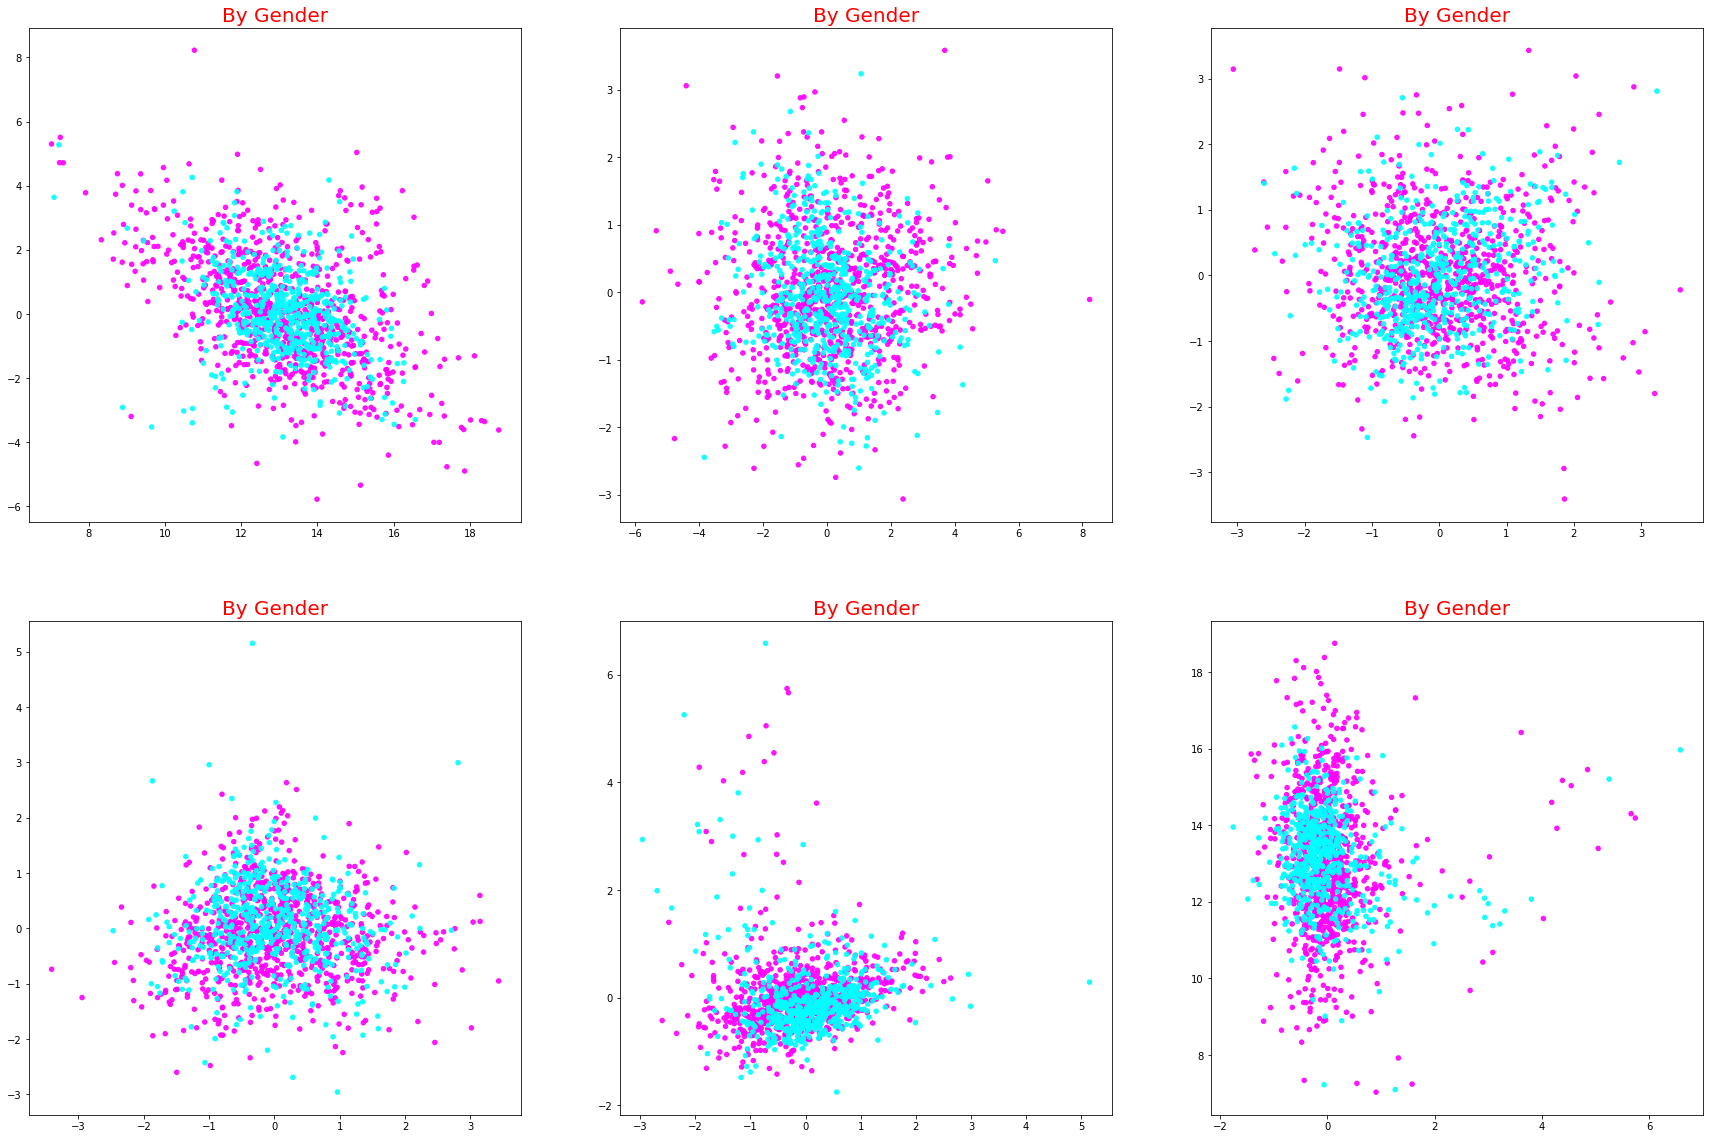

In [51]:
import matplotlib as mpl
#mpl.style.use('default')
mpl.rcParams['image.cmap'] = 'cool'  #zero is cyan, one is pink

start = 0
plot_all_dimensions(clips_dr[:,start:start+6], clips["gender"]=="M", "By Gender")

### PCA

In [16]:
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
pca = PCA(n_components=30, random_state=3)
clips_pca = pca.fit_transform(clips.iloc[:,6:])
print(pca.explained_variance_ratio_.sum())

0.6550424530090901


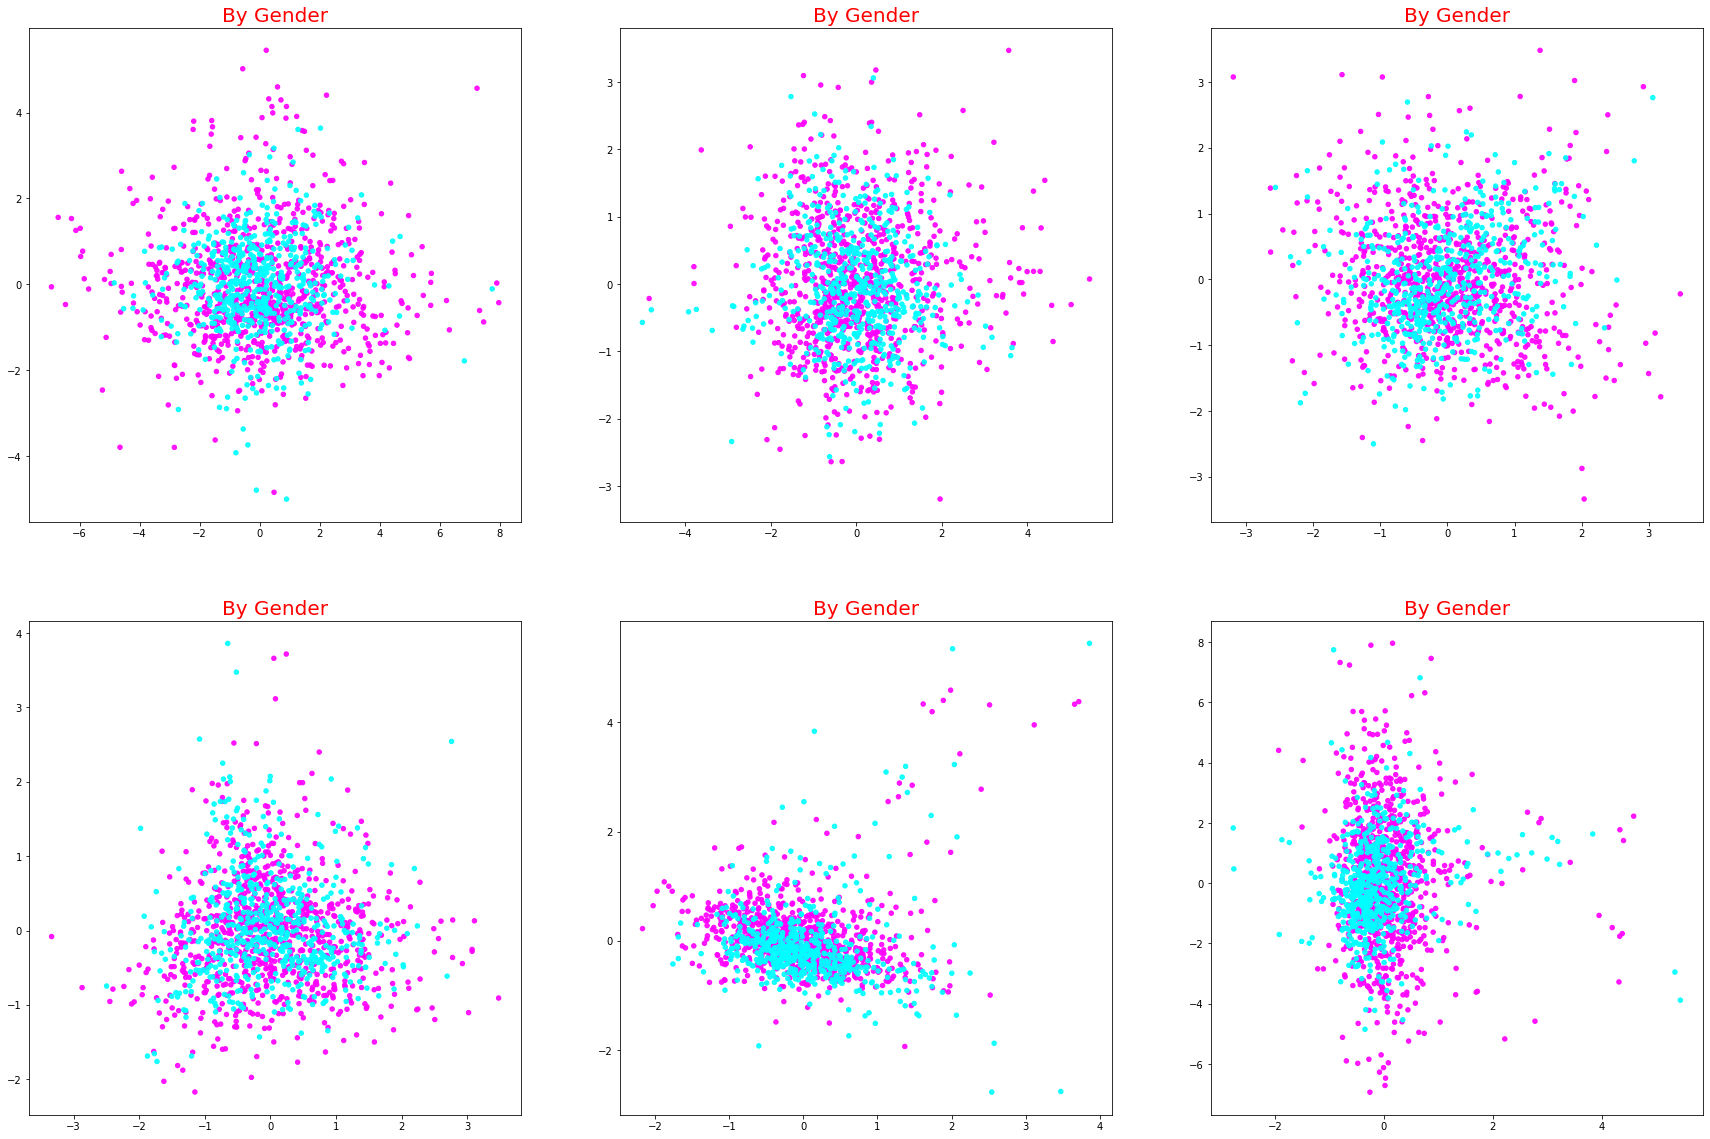

In [17]:
import matplotlib as mpl
#mpl.style.use('default')
mpl.rcParams['image.cmap'] = 'cool'  #zero is cyan, one is pink

start =0
plot_all_dimensions(clips_pca[:,start:start+6], clips["gender"]=="M", "By Gender")

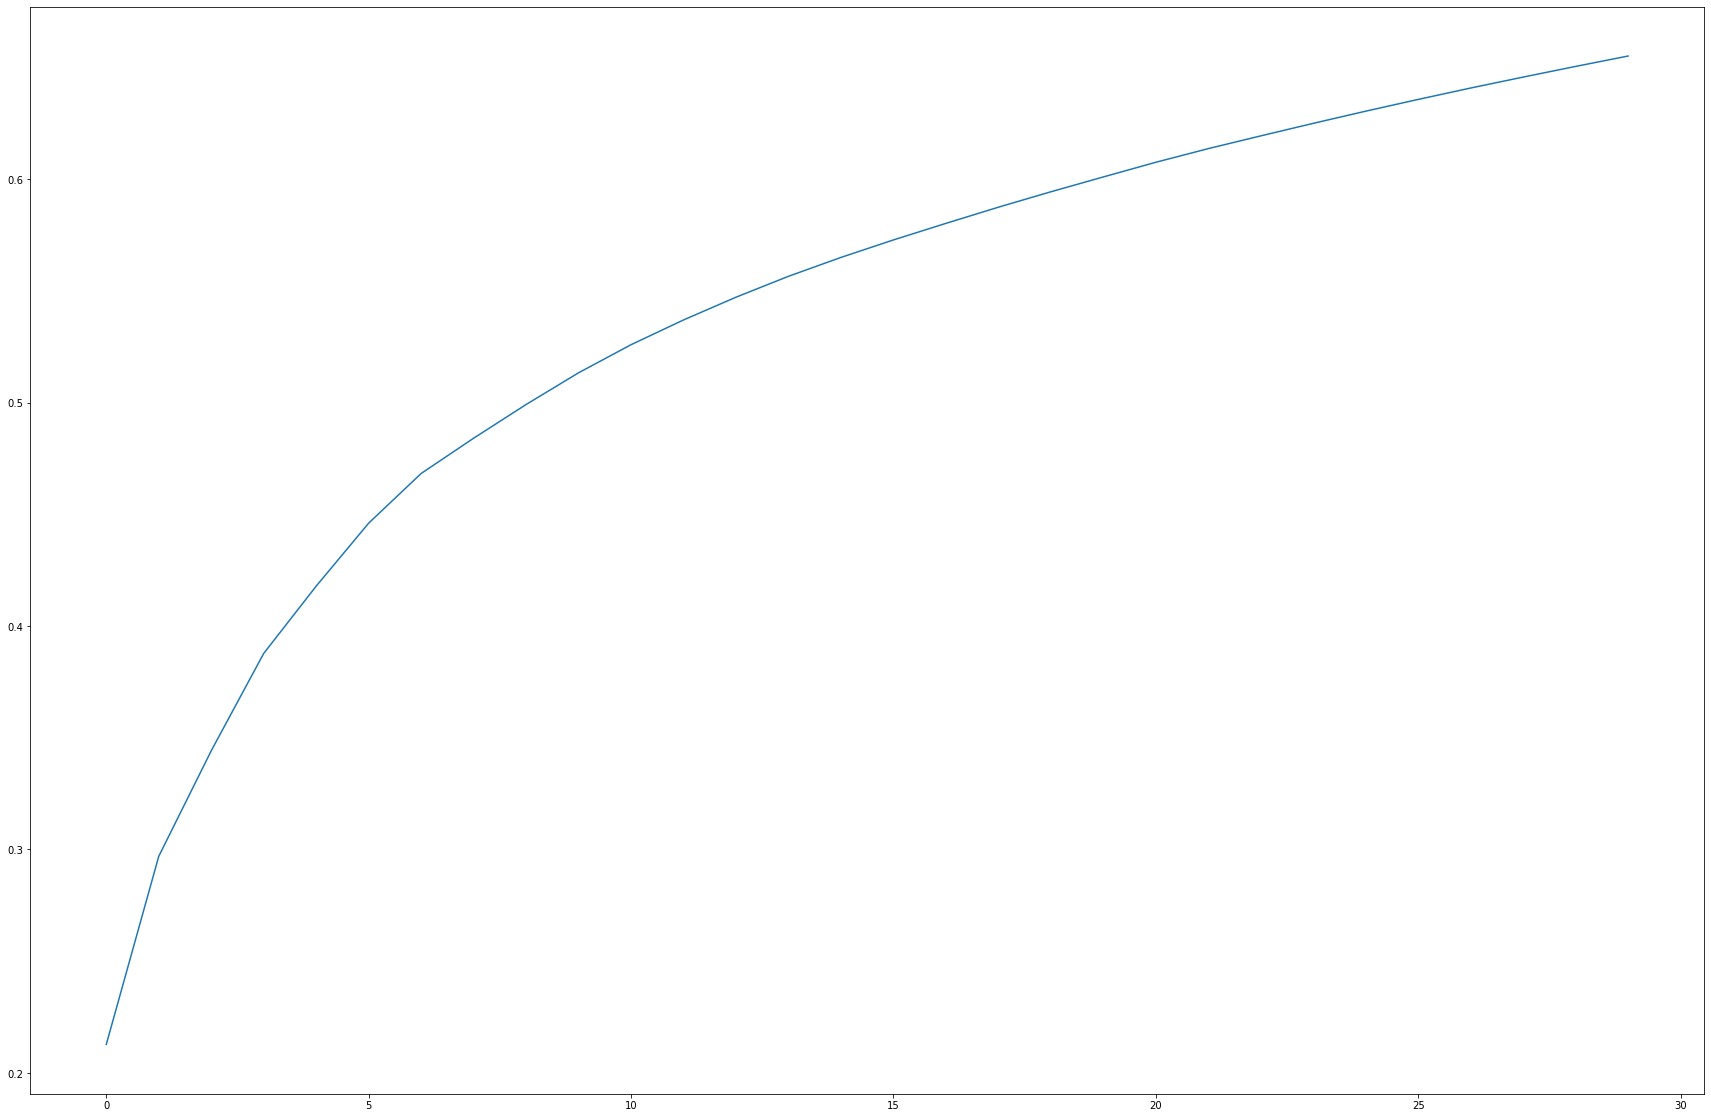

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### NMF

In [13]:
nmf = NMF(n_components=12, random_state=3)
non_negClips = (clips.iloc[:,6:]).to_numpy()
non_negClips[non_negClips<0] = 100
clips_nmf = nmf.fit_transform(non_negClips)

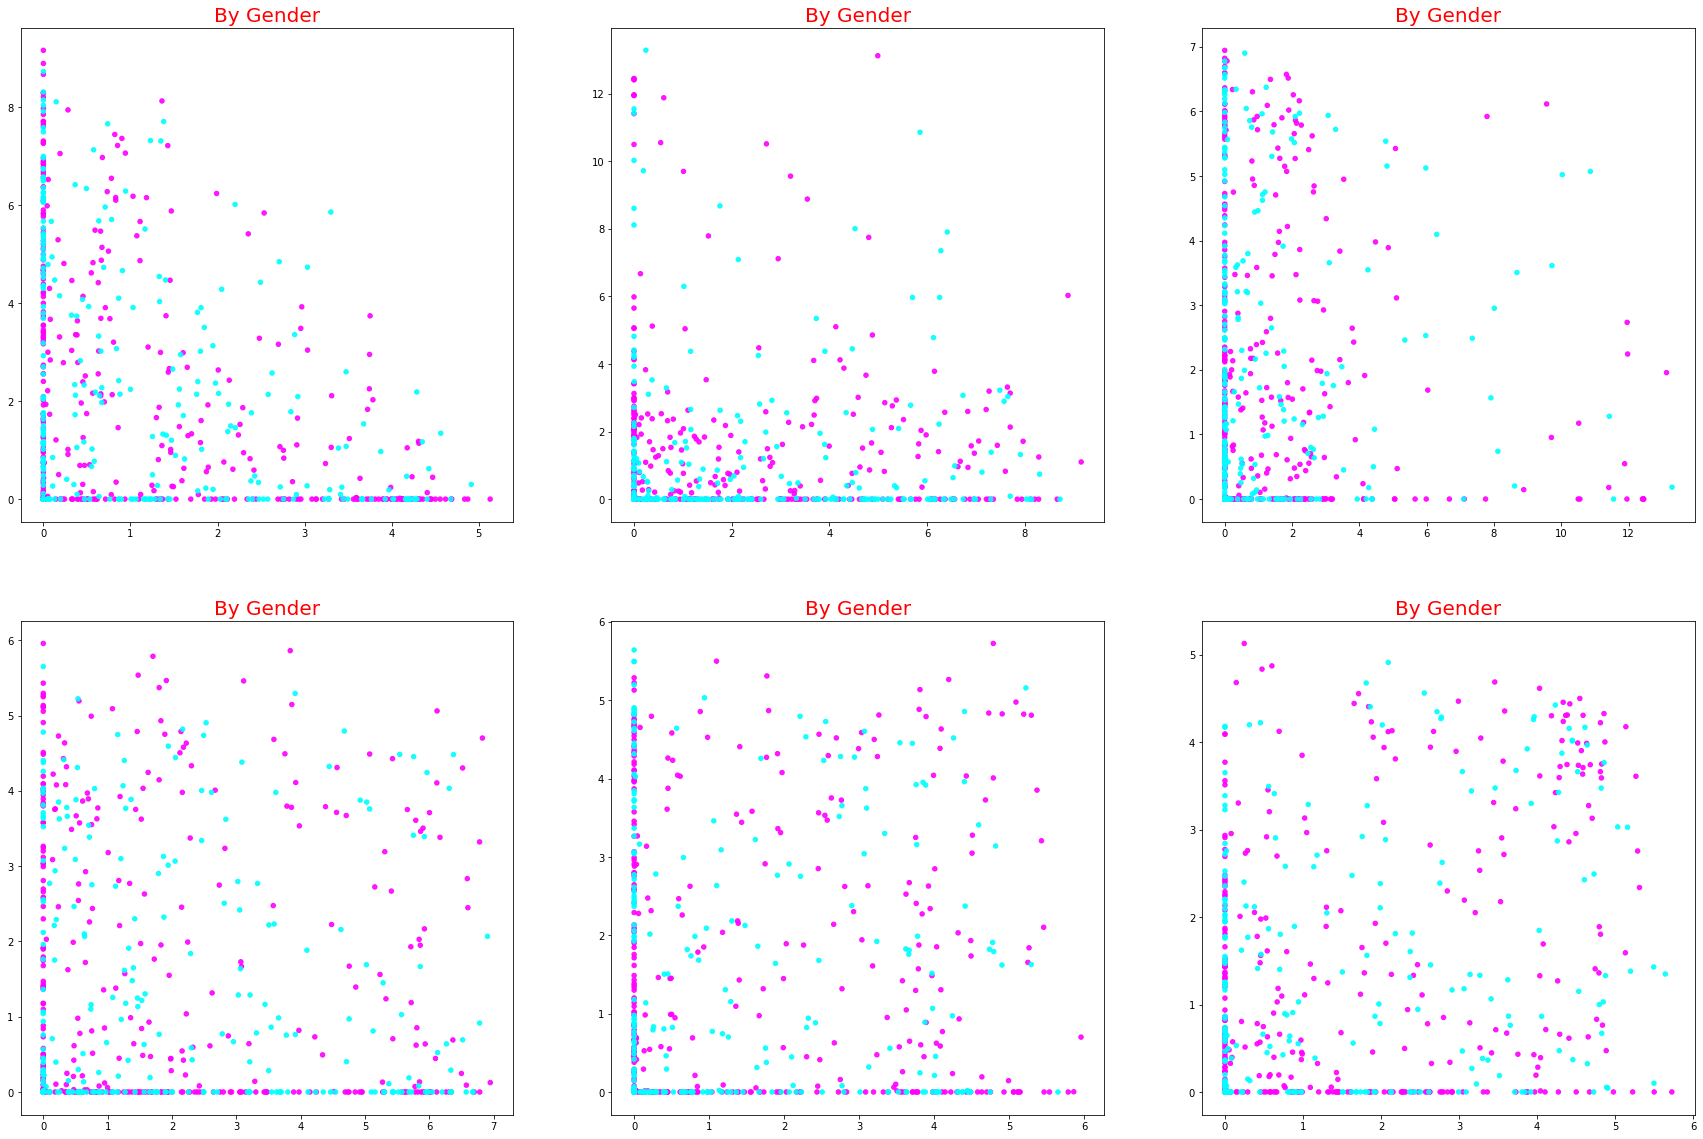

In [14]:
start =0
plot_all_dimensions(clips_nmf[:,start:start+6],(clips["gender"]=="M"), "By Gender")

### LSA - w/ neg number treatment

In [15]:
non_negClips = (clips.iloc[:,6:]).to_numpy()
non_negClips[non_negClips<0] = 0

svd2 = TruncatedSVD(n_components=9, n_iter=20, random_state=3)
clips_svd2 = svd2.fit_transform(non_negClips)
print(svd2.explained_variance_ratio_.sum())

0.5140907709429092


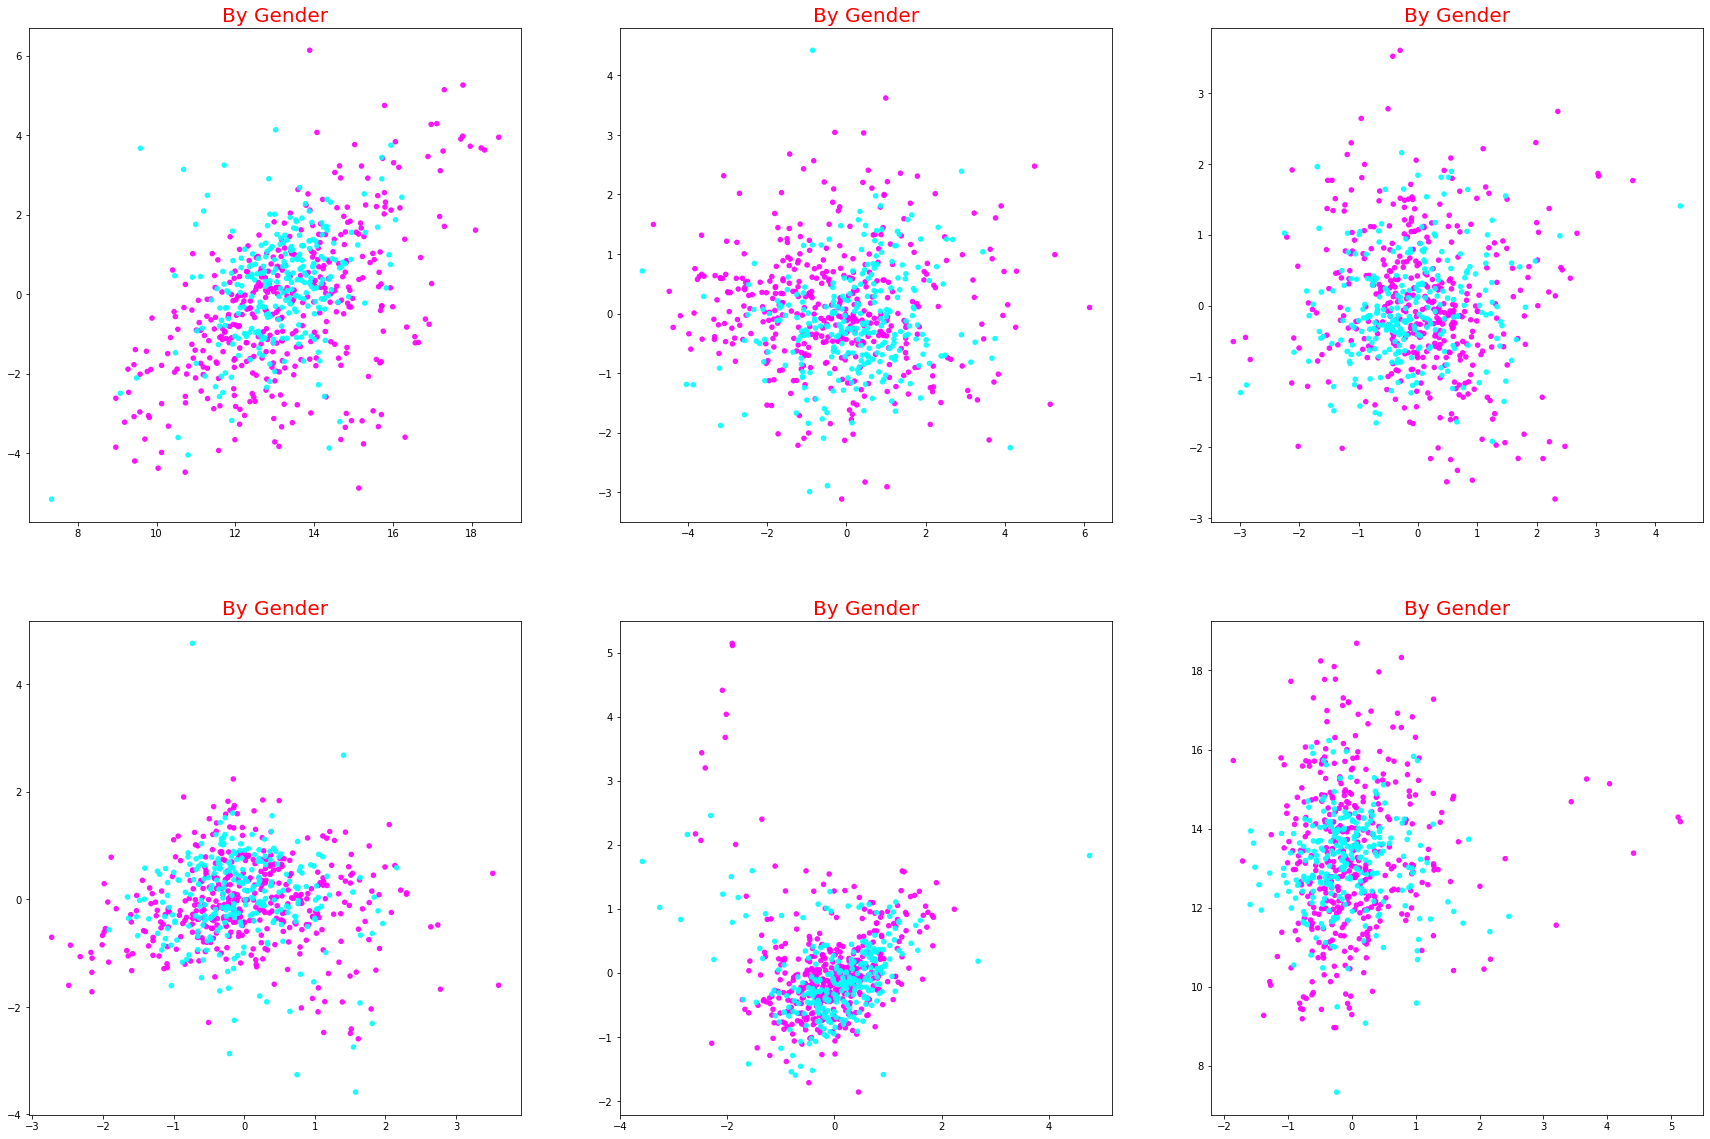

In [16]:
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'cool'

start = 0
plot_all_dimensions(clips_svd2[:,start:start+6], clips["gender"]=="M", "By Gender")

In [294]:
non_negClips.shape

(691, 864)

### Class for finding similar clips

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
import heapq

class simClips():
    """
    """
    def __init__(self, matrix, clips):
        """
        matrix is the dimensionality reduced matrix in numpy or lists format
        clips is the pandas dataframe of the data
        """
        self.matrix = np.array(matrix)
        self.obs = matrix.shape[0]
        self.features = matrix.shape[1]
        self.clips = clips
        
    
    def getSimilarN(self, row = None, N=9, dist_metric="cosine"):
        if row == None:
            sampled_row = np.random.randint(0, self.obs)
        else:
            sampled_row = row
        
        assert sampled_row <= self.obs
        
        center = self.matrix[sampled_row]
        
        if dist_metric == "cosine":
            dist = np.array([1-distance.cosine(row, center) for row in self.matrix])
            SimiarlNIndices = heapq.nlargest(N, range(len(dist)), dist.take)
        else:  #assumes euclidean
            dist = np.array([distance.euclidean(row, center) for row in self.matrix])
            SimiarlNIndices = heapq.nsmallest(N, range(len(dist)), dist.take)
            
        return SimiarlNIndices
    

    def getSimilarN_Poses(self, row = None, N=9, dist_metric="cosine"):
        """
        Rescaled to fit 640 X 360
        """
        sims_idx = self.getSimilarN(row = row, N=N, dist_metric=dist_metric)
        
        sims_clips = self.clips.iloc[sims_idx,6:].to_numpy()
        sims_clips = sims_clips.reshape((N, SLIDE, -1))
        
        sims_meta = self.clips.iloc[sims_idx,:6].to_numpy()
        
        #rescale
        for i in range(0, sims_clips.shape[2]):
            if i%2 == 0:
                sims_clips[:,:,i] = sims_clips[:,:,i] / xScale
            else:
                sims_clips[:,:,i] = sims_clips[:,:,i] / yScale
        
        return sims_meta, sims_clips
    

In [67]:
import cv2
import numpy as np
from IPython.display import Video, Image, display
vids_loc = "../data/vids/"

def poseDetectOnFrames(file_name, file_output, start_frame=0, end_frame=20, step=1):
    cap = cv2.VideoCapture(file_name)
    #success,image = cap.read()
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
    #---
    count = 0
    success = True
    while success:
        success,image = cap.read()
        if count > start_frame and count%step==0 and success:
            #cv2.imwrite(file_output+"%d.jpg" % count, image)     # save frame as JPEG file
            #print('Read a new frame: ', success)
            img1 = getPoseImage(image)
            #cv2.line(img1, (160, 180), (480, 180), [0,0,0], 3, cv2.LINE_AA)
            out.write(img1)
        if count>end_frame:
            break
        count += 1
    print(f"count is: {count}")
    cap.release()
    out.release()

def getFrames(file_name, file_output, start_frame=0, end_frame=20, step=1):
    cap = cv2.VideoCapture(file_name)
    #success,image = cap.read()
    
    images = []
    
    #---
    #fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    #out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
    #---
    count = 0
    success = True
    while success:
        success,image = cap.read()
        if count >= start_frame and count%step==0 and success:
            #cv2.imwrite(file_output+"%d.jpg" % count, image)     # save frame as JPEG file
            #print('Read a new frame: ', success)
            #img1 = getPoseImage(image)
            #cv2.line(img1, (160, 180), (480, 180), [0,0,0], 3, cv2.LINE_AA)
            #out.write(img1)
            images.append(image)
        if count>end_frame:
            break
        count += 1
    #print(f"count is: {count}")
    cap.release()
    #out.release()
    
    return images

def getSimilarVideoClipImages(list_of_video_clips):
    #clips = len(list_of_video_clips)
    imgs = [] # This is a No of Clips X time steps X Images (W X H X Channels)
    
    for vd_clips in list_of_video_clips:
        #print(f"{vd_clips[0]} - {vd_clips[1]} to {vd_clips[2]}  ")
        temp_imgs = getFrames(vids_loc+vd_clips[0], "doesNotMatter", start_frame=vd_clips[1], end_frame=vd_clips[2])
        imgs.append(temp_imgs)
    
    return imgs

def similar9ClipsVideo(sim_clip_images, file_output):
    """
    """
    sim_clip_images = np.array(sim_clip_images)
    t_steps = sim_clip_images.shape[1]
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (3*640,  3*360))
    
    #---
    for t in range(0, t_steps):
        imgs_at_t = sim_clip_images[:,t,...]
        t1 = np.concatenate((imgs_at_t[0,...], imgs_at_t[1,...], imgs_at_t[2,...]), axis = 1)
        t2 = np.concatenate((imgs_at_t[3,...], imgs_at_t[4,...], imgs_at_t[5,...]), axis = 1)
        t3 = np.concatenate((imgs_at_t[6,...], imgs_at_t[7,...], imgs_at_t[8,...]), axis = 1)

        f = np.concatenate((t1, t2, t3), axis=0)
        out.write(f)
    out.release()
    
def similar3ClipsVideo(sim_clip_images, file_output):
    """
    """
    sim_clip_images = np.array(sim_clip_images)
    t_steps = sim_clip_images.shape[1]
    
    #---
    fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (3*640,  1*360))
    
    #---
    for t in range(0, t_steps):
        imgs_at_t = sim_clip_images[:,t,...]
        t1 = np.concatenate((imgs_at_t[0,...], imgs_at_t[1,...], imgs_at_t[2,...]), axis = 1)
        #t2 = np.concatenate((imgs_at_t[3,...], imgs_at_t[4,...], imgs_at_t[5,...]), axis = 1)
        #t3 = np.concatenate((imgs_at_t[6,...], imgs_at_t[7,...], imgs_at_t[8,...]), axis = 1)

        #f = np.concatenate((t1, t2, t3), axis=0)
        out.write(t1)
    out.release()

In [25]:
import itertools

def plot_salsa_grid(grid_clips, fileout="", file_format="gif"):
    """
    grid_clips is a N x frames X 36 numpy array
    """
    N = grid_clips[1].shape[0]
    no_of_frames = grid_clips[1].shape[1]
    meta = grid_clips[0]
    
    plt.rcParams['figure.figsize'] = [30, 20]                              
    fig, axs = plt.subplots(3, 3)
    #ax = plt.axes(xlim=(0, 640), ylim=(0, 360))
                              
    def animate(i):
        iters = list(itertools.product(range(0, 3), range(0, 3)))
        for idx, tup in enumerate(iters):
            axs[tup[0], tup[1]].clear()
            pose = grid_clips[1][idx][i].reshape((-1, 2))
            
            #print(pose)
            imgArray = np.ones((360, 640))
            axs[tup[0], tup[1]].imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
            for pair in POSE_PAIRS_MOD:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (pose[pair[0]][0] != -1)
                valid_pt2 = (pose[pair[1]][0] != -1)
                if valid_pt1 and valid_pt2:
                    xs = [pose[pair[0]][0], pose[pair[1]][0]]
                    ys = [pose[pair[0]][1], pose[pair[1]][1]]
                    axs[tup[0], tup[1]].plot(xs, ys,'ko-', linewidth=1, markersize = 5)
            axs[tup[0], tup[1]].set_title(f"Performance: {meta[idx][1]}, frames {meta[idx][4]} to {meta[idx][5]}",
                                          fontsize=20, color='red')

    plt.tight_layout()
    anim = FuncAnimation(fig, animate, frames=no_of_frames, interval=125)
    #anim
    anim.save('../data/viz/test'+fileout+'.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


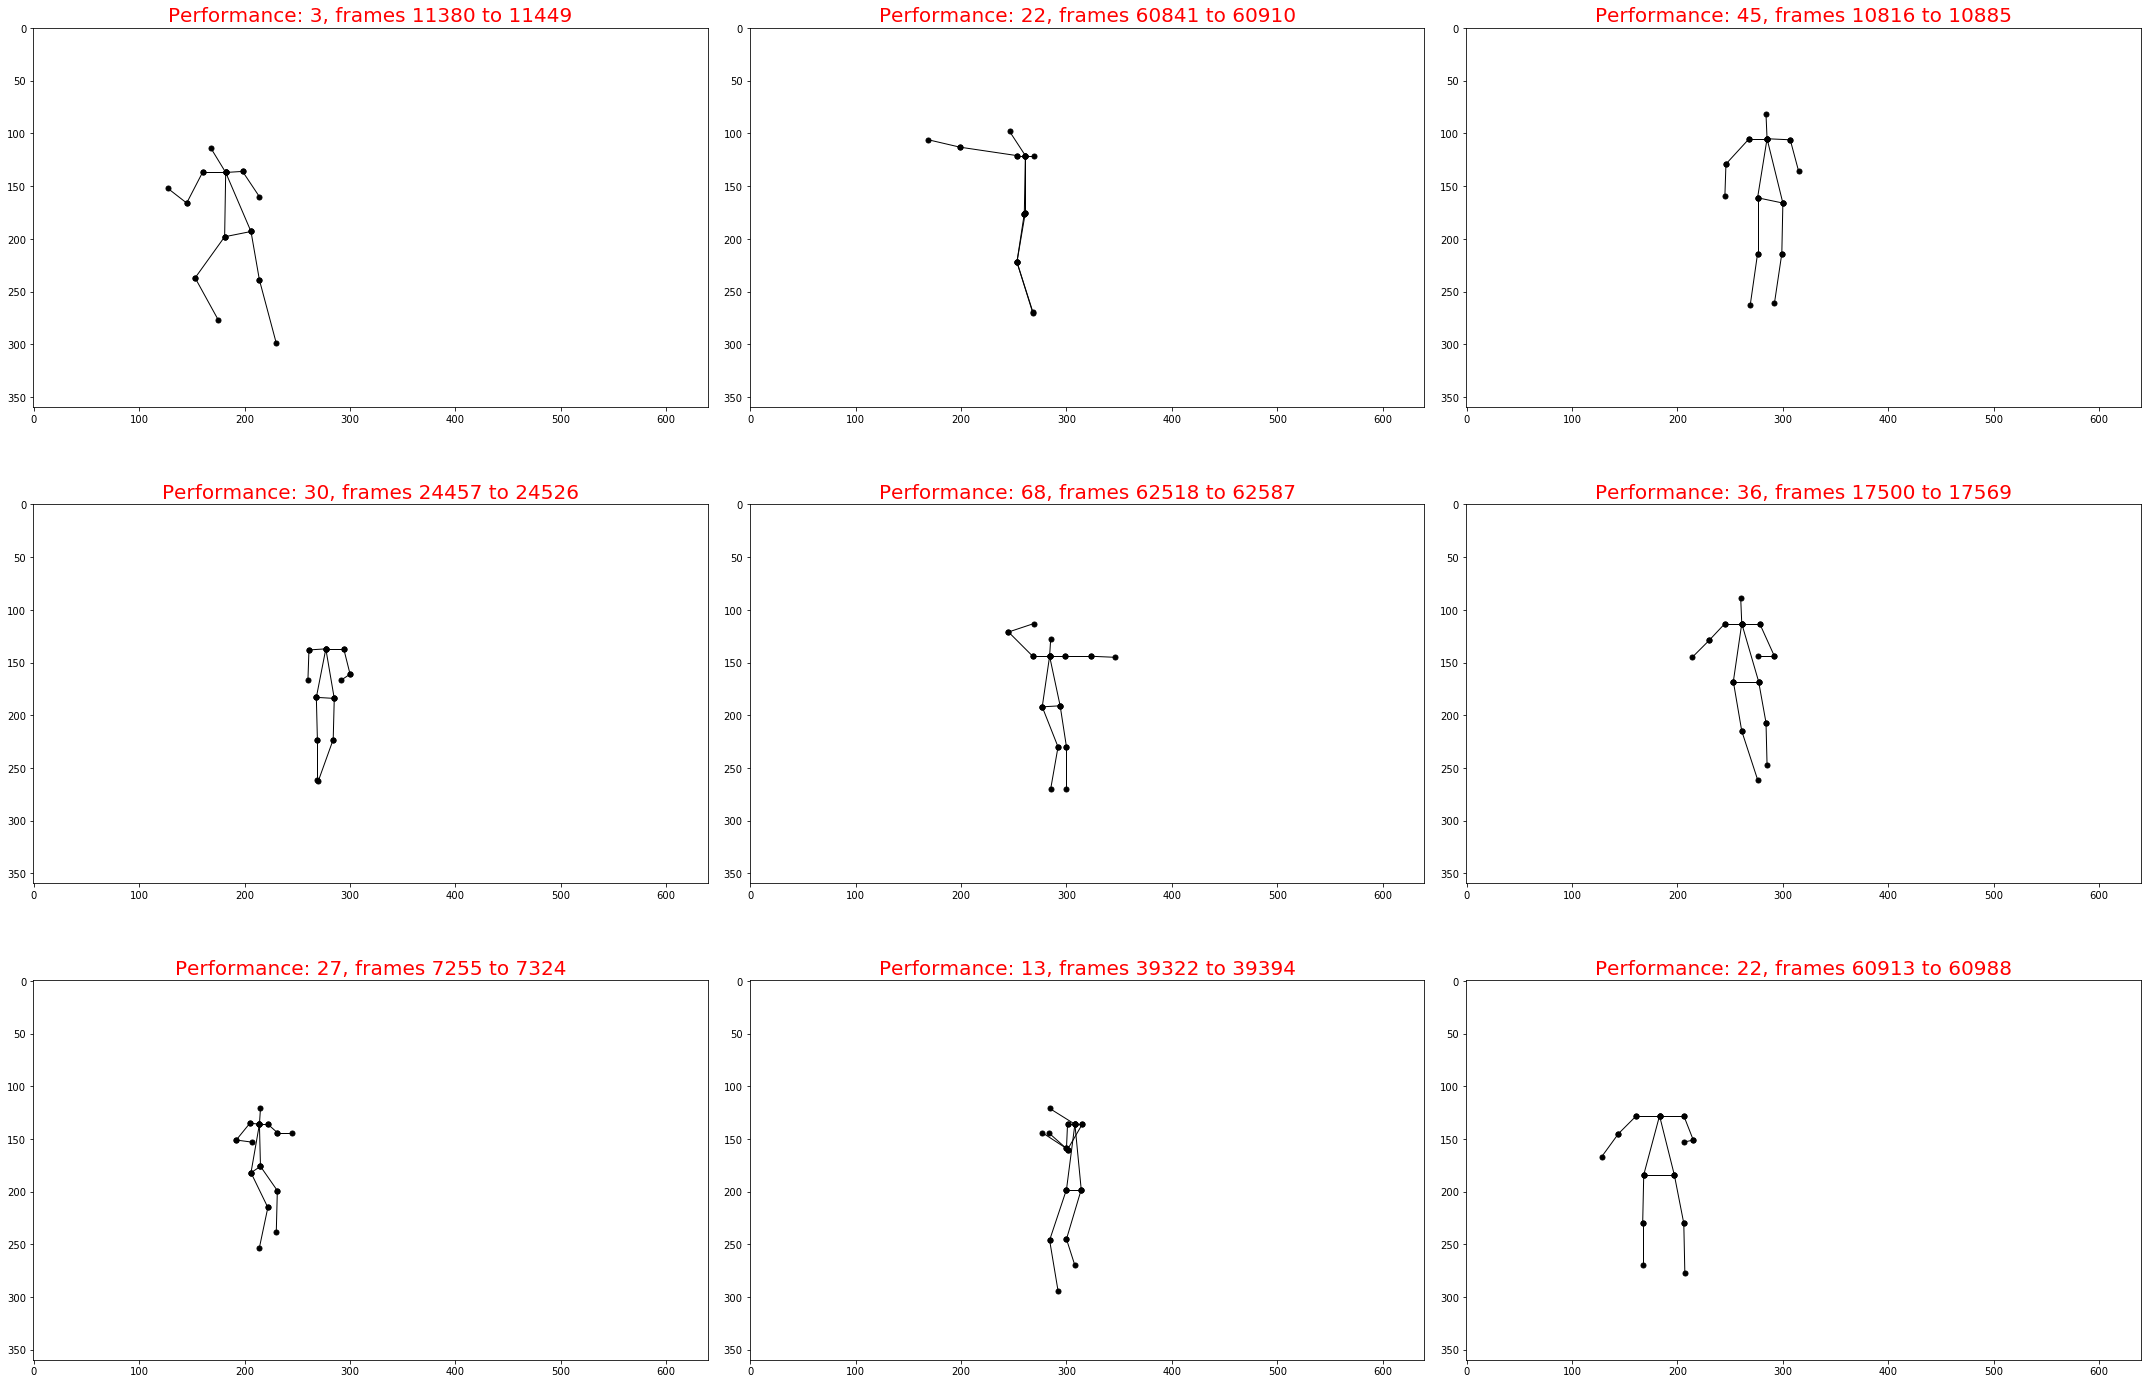

In [76]:
a = simClips(clips_dr, clips)
sim_clips = a.getSimilarN_Poses(row = 106, dist_metric="cosine") #sim_clips is a tuple (sim_meta and sim_data)
plot_salsa_grid(sim_clips, "Mens_175_full_lsa_cos")
#print(sim_clips[0][3][2])

In [72]:
clips_vid = "../data/viz/Mesn_175_4nHElVbT3HY_lsa-cos_"
frames_for_clips = list(sim_clips[0][:,3:])
frames_for_clips = [[f[0], f[1], f[1]+24*EVAL_TIME] for f in frames_for_clips]

sim_clip_images = getSimilarVideoClipImages(frames_for_clips)
similar9ClipsVideo(sim_clip_images, clips_vid)
Video(clips_vid+".mp4", width=640, height=360)

In [73]:
frames_for_clips

[['4nHElVbT3HY.mp4', 18688, 18760],
 ['L5mqL7ADEsY.mp4', 43309, 43381],
 ['L5mqL7ADEsY.mp4', 11968, 12040],
 ['ITNiqNcl6Mw.mp4', 5452, 5524],
 ['L5mqL7ADEsY.mp4', 11896, 11968],
 ['4nHElVbT3HY.mp4', 32095, 32167],
 ['L5mqL7ADEsY.mp4', 13837, 13909],
 ['L5mqL7ADEsY.mp4', 42937, 43009],
 ['L5mqL7ADEsY.mp4', 10888, 10960]]

In [74]:
Clip_175 = [['4nHElVbT3HY.mp4', 18688, 18688+24*3],
            ['ITNiqNcl6Mw.mp4', 5452, 5452+24*3],
            ['L5mqL7ADEsY.mp4', 42937, 42937+24*3],
           ]

In [75]:
#---
clips_vid = "../data/viz/Clip175_Result"
#threeclips = [frames_for_clips[i] for i in clipIdx]

sim_clip_images = getSimilarVideoClipImages(Clip_175)
similar3ClipsVideo(sim_clip_images, clips_vid)


In [ ]:
#---
clips_vid = "../data/viz/Val_105_Result"
Val_105_clips = [['4nHElVbT3HY.mp4', 25120, 25120+24*3],
                 ['L5mqL7ADEsY.mp4', 13153, 13153+24*3],
                 ['4nHElVbT3HY.mp4', 60841, 60913]
                ]

sim_clip_images = getSimilarVideoClipImages(threeclips)
similar3ClipsVideo(sim_clip_images, clips_vid)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matpl

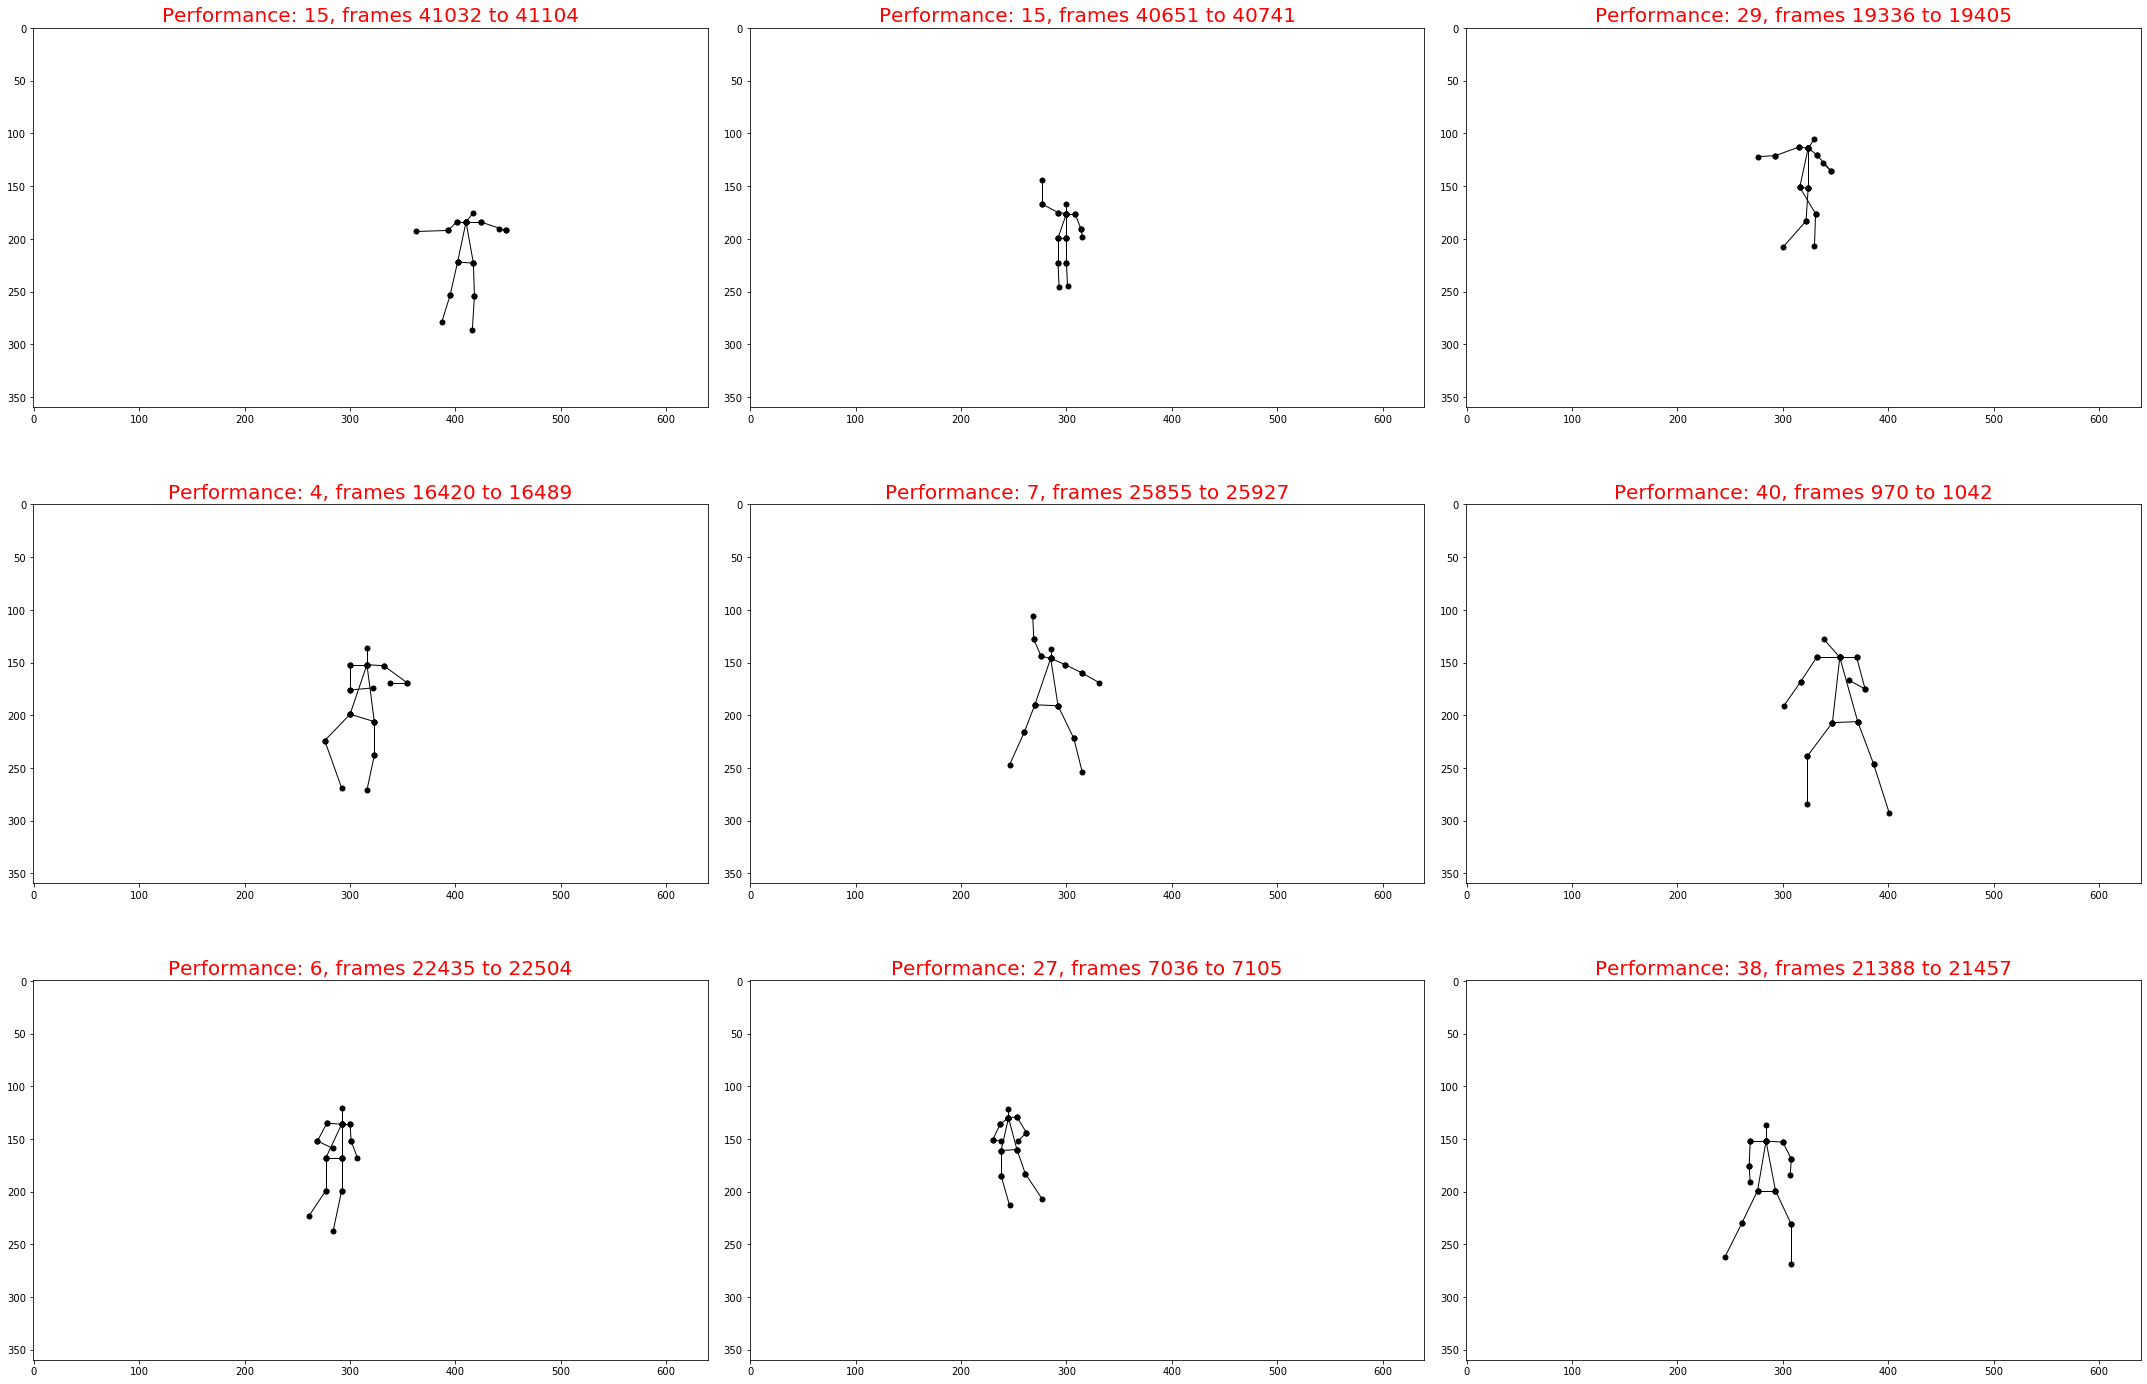

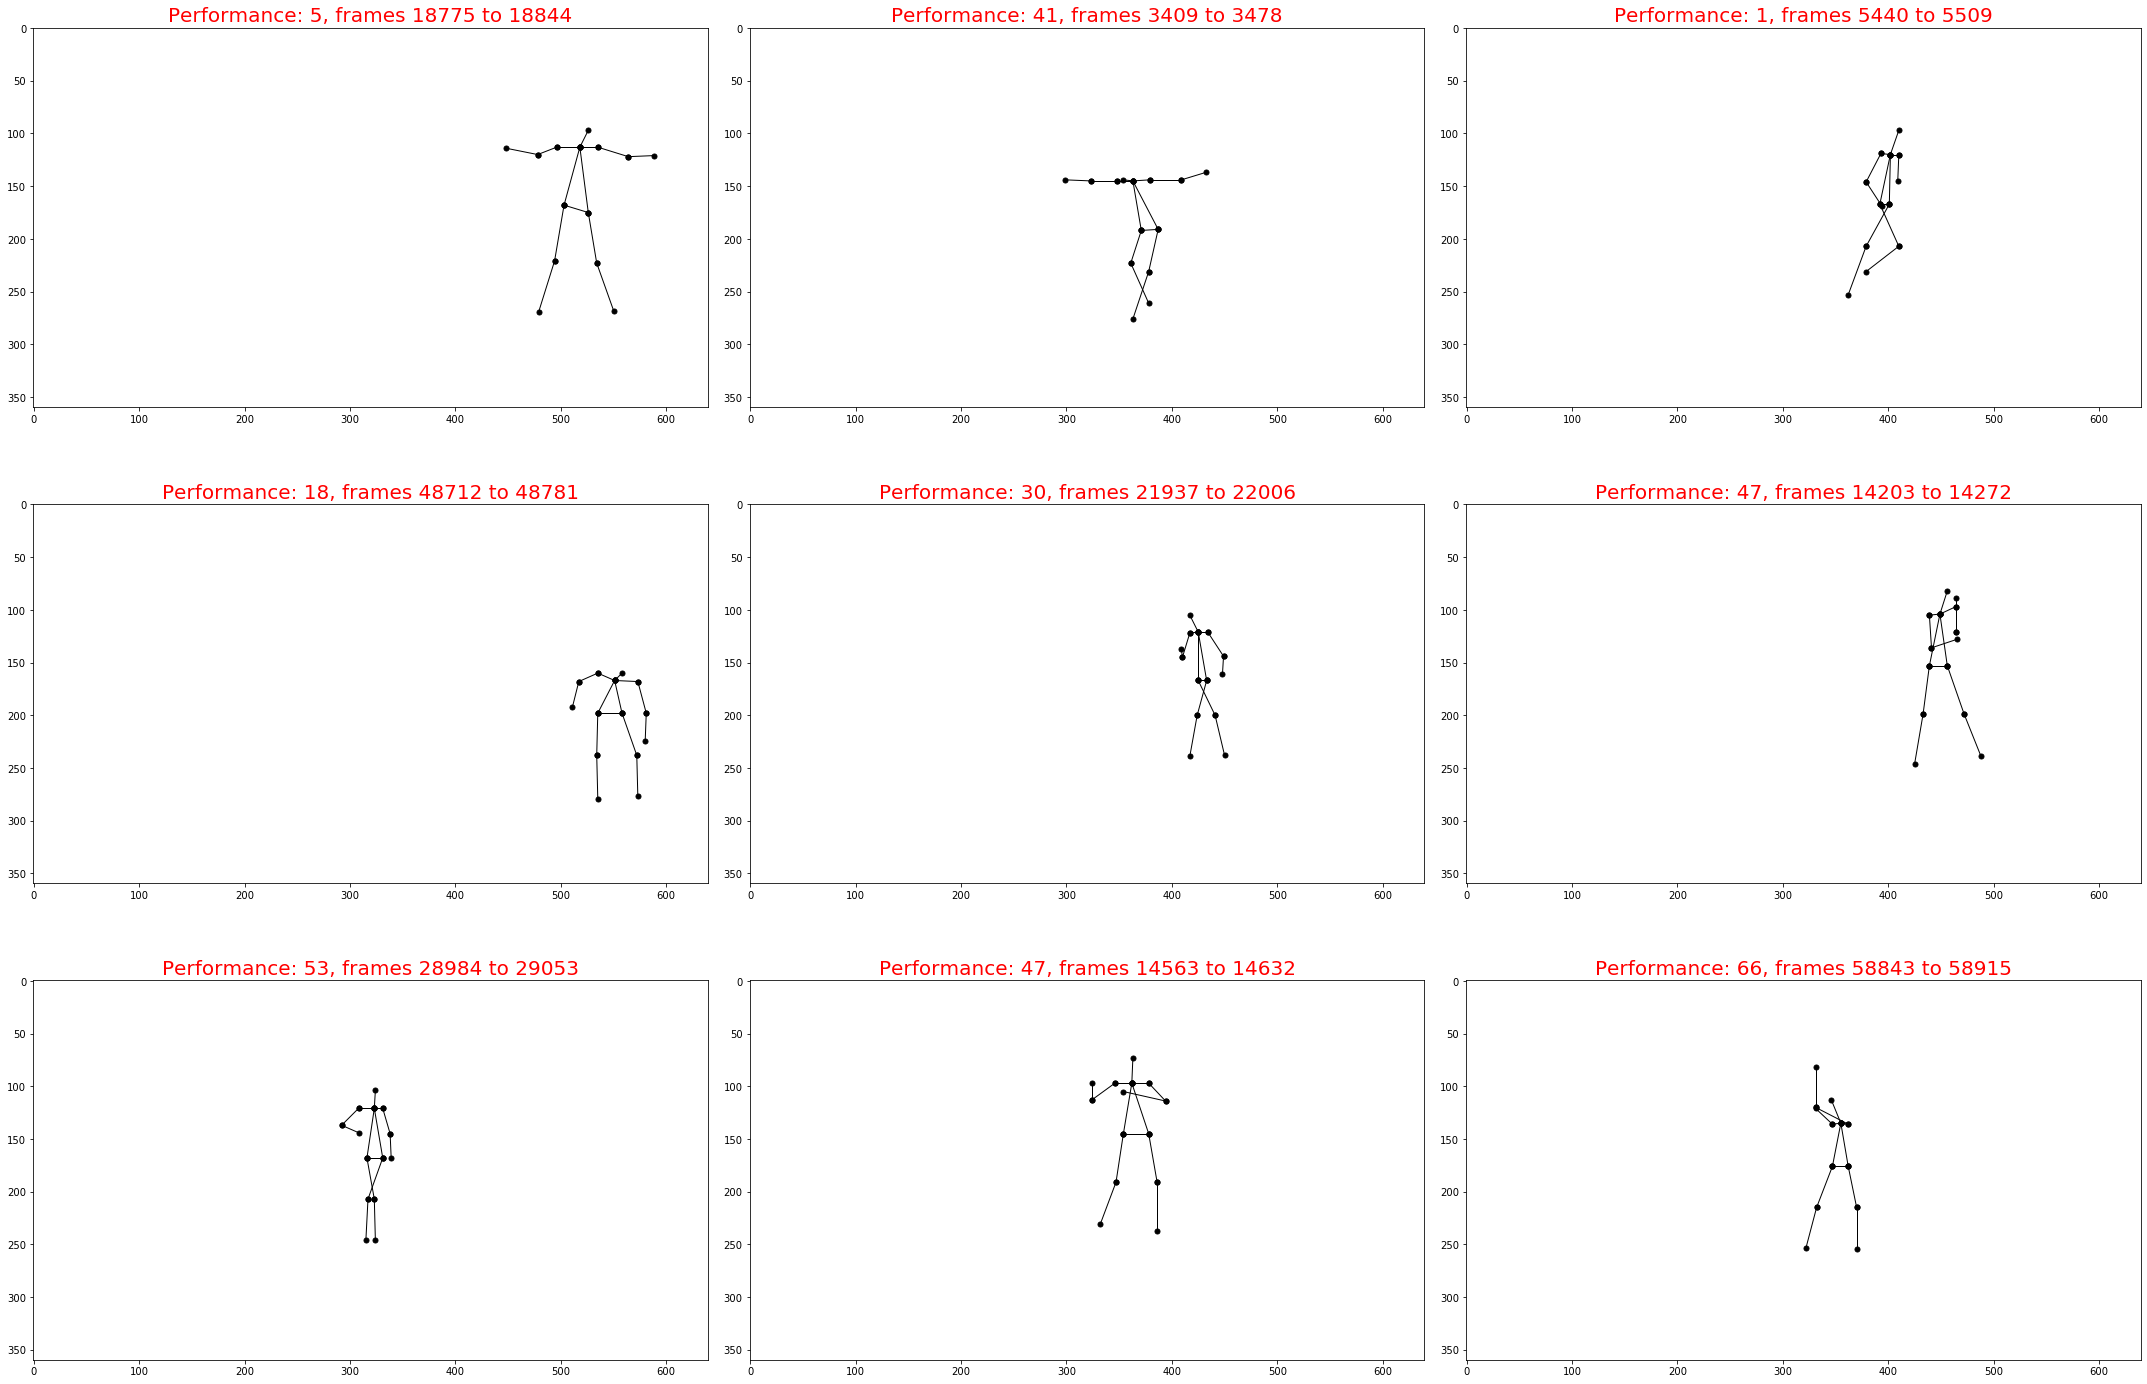

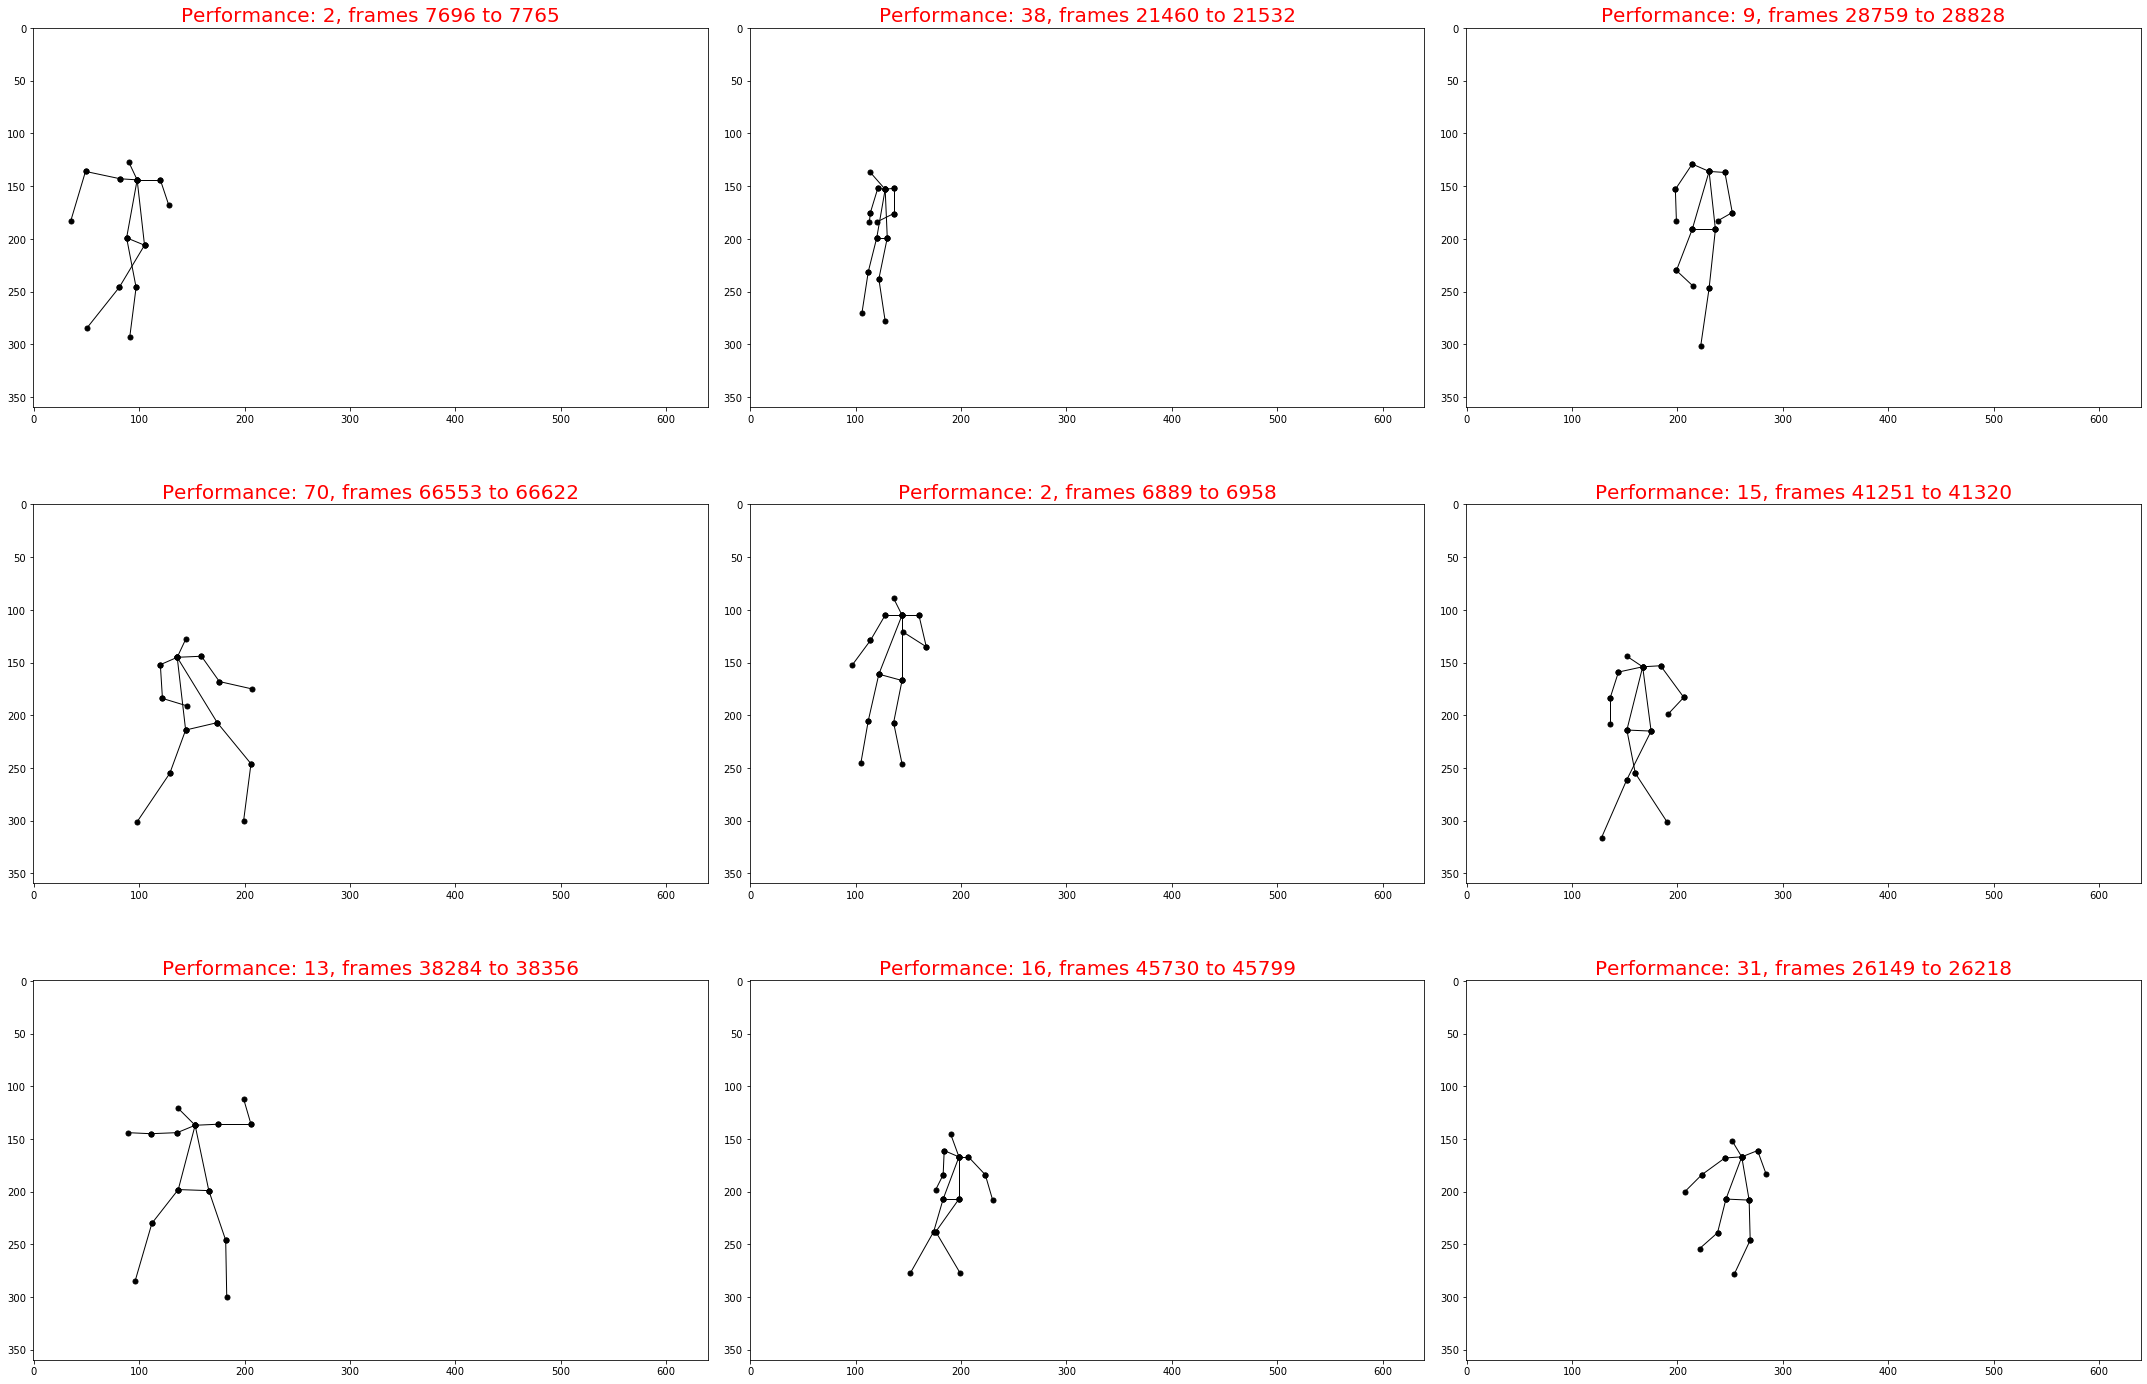

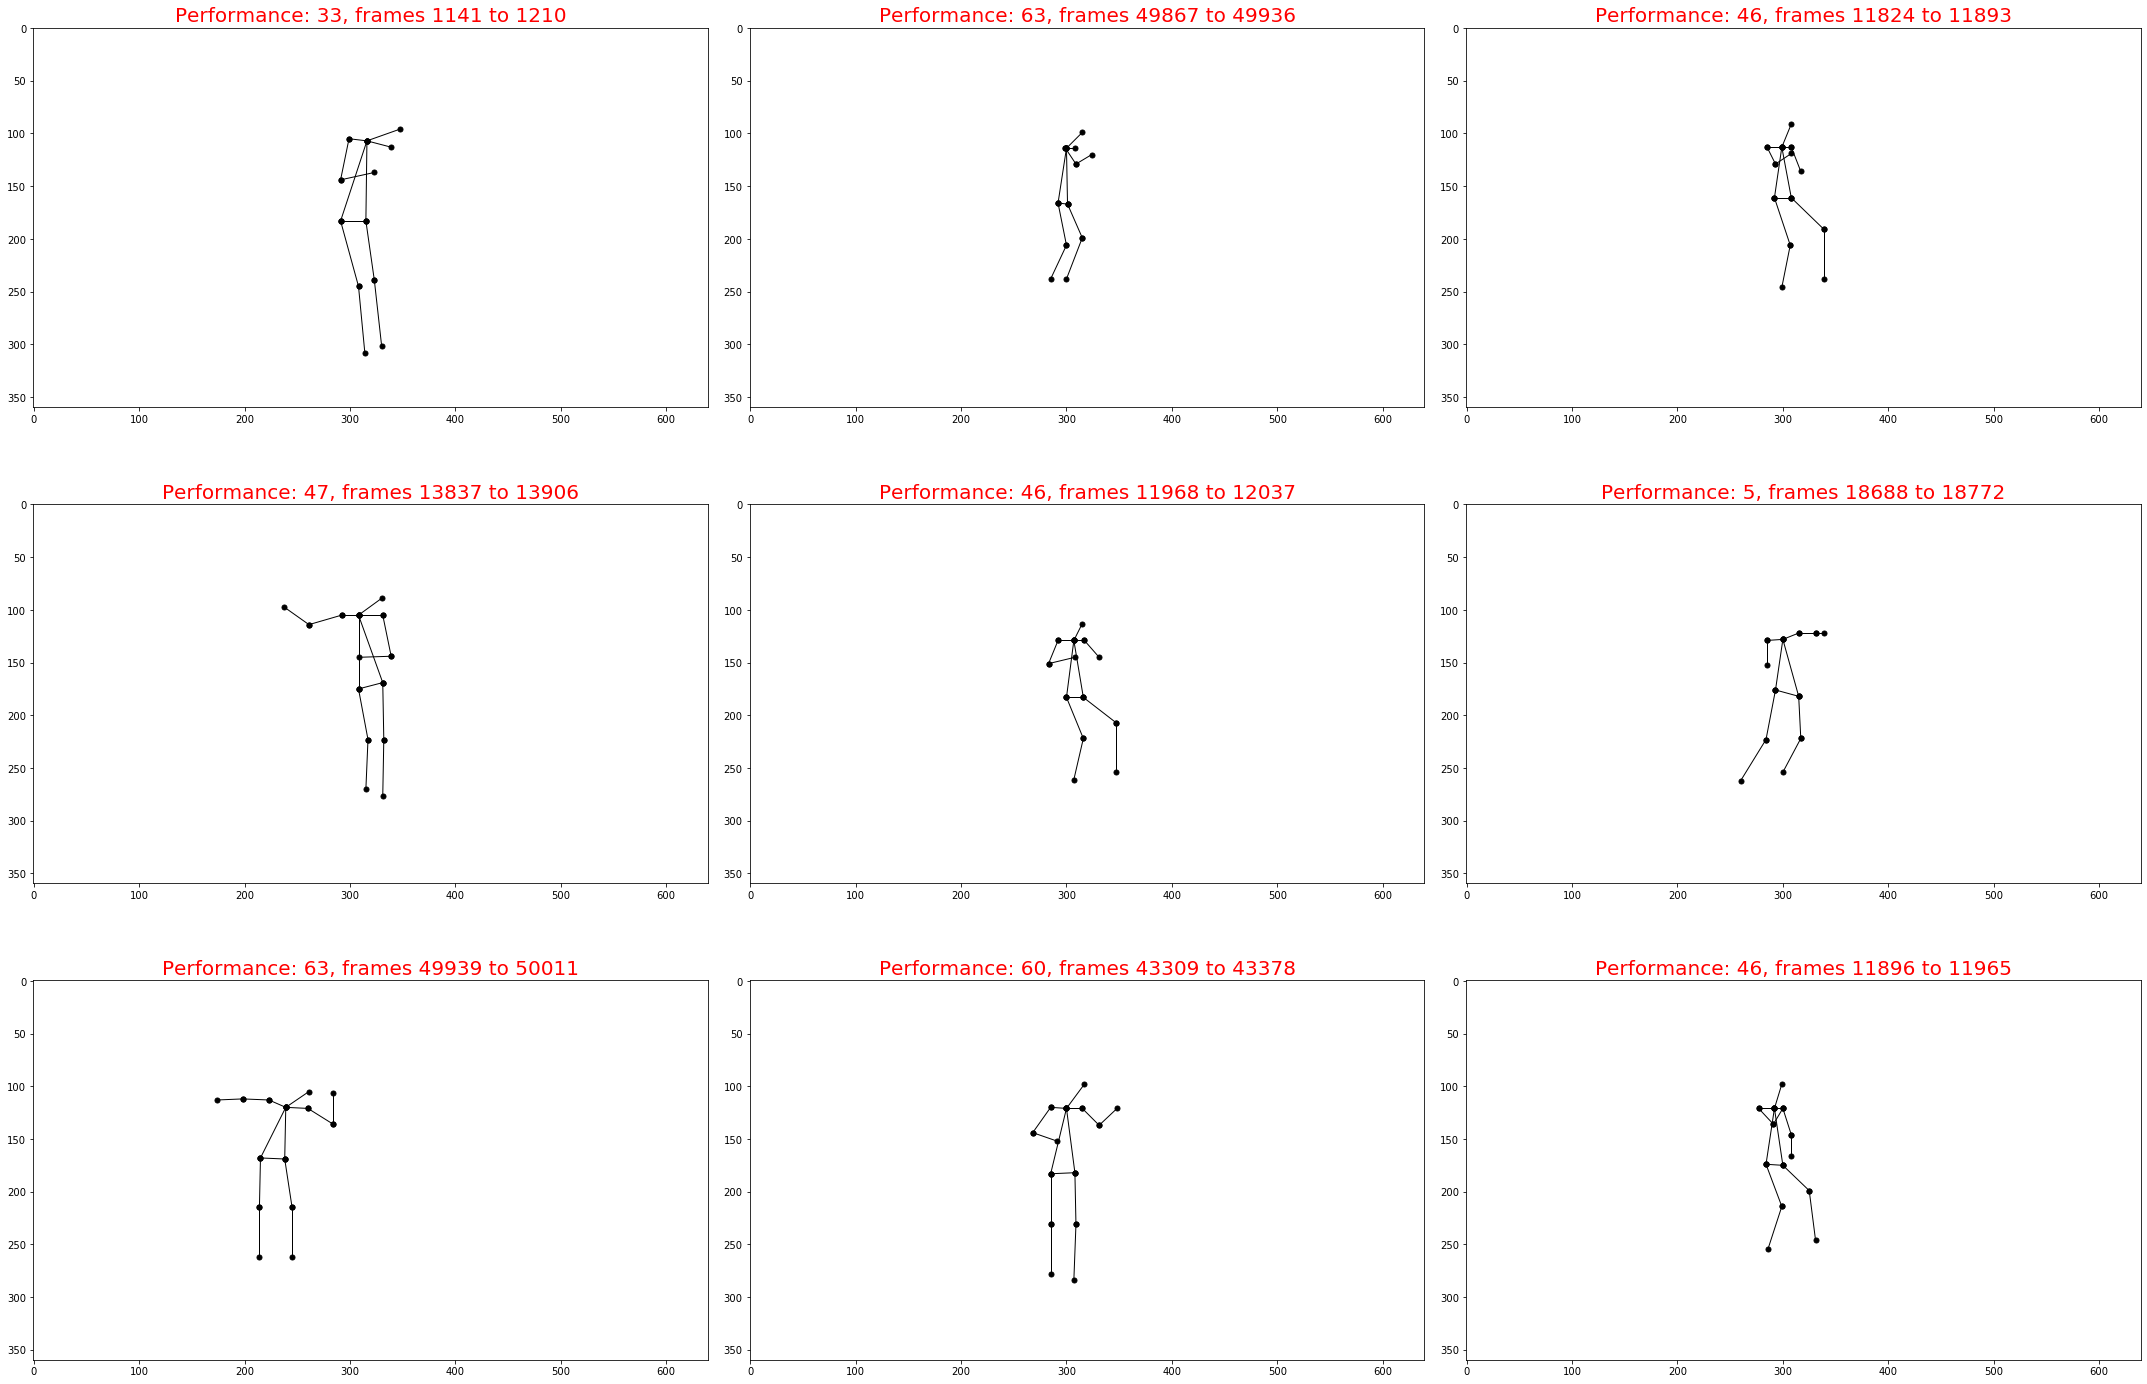

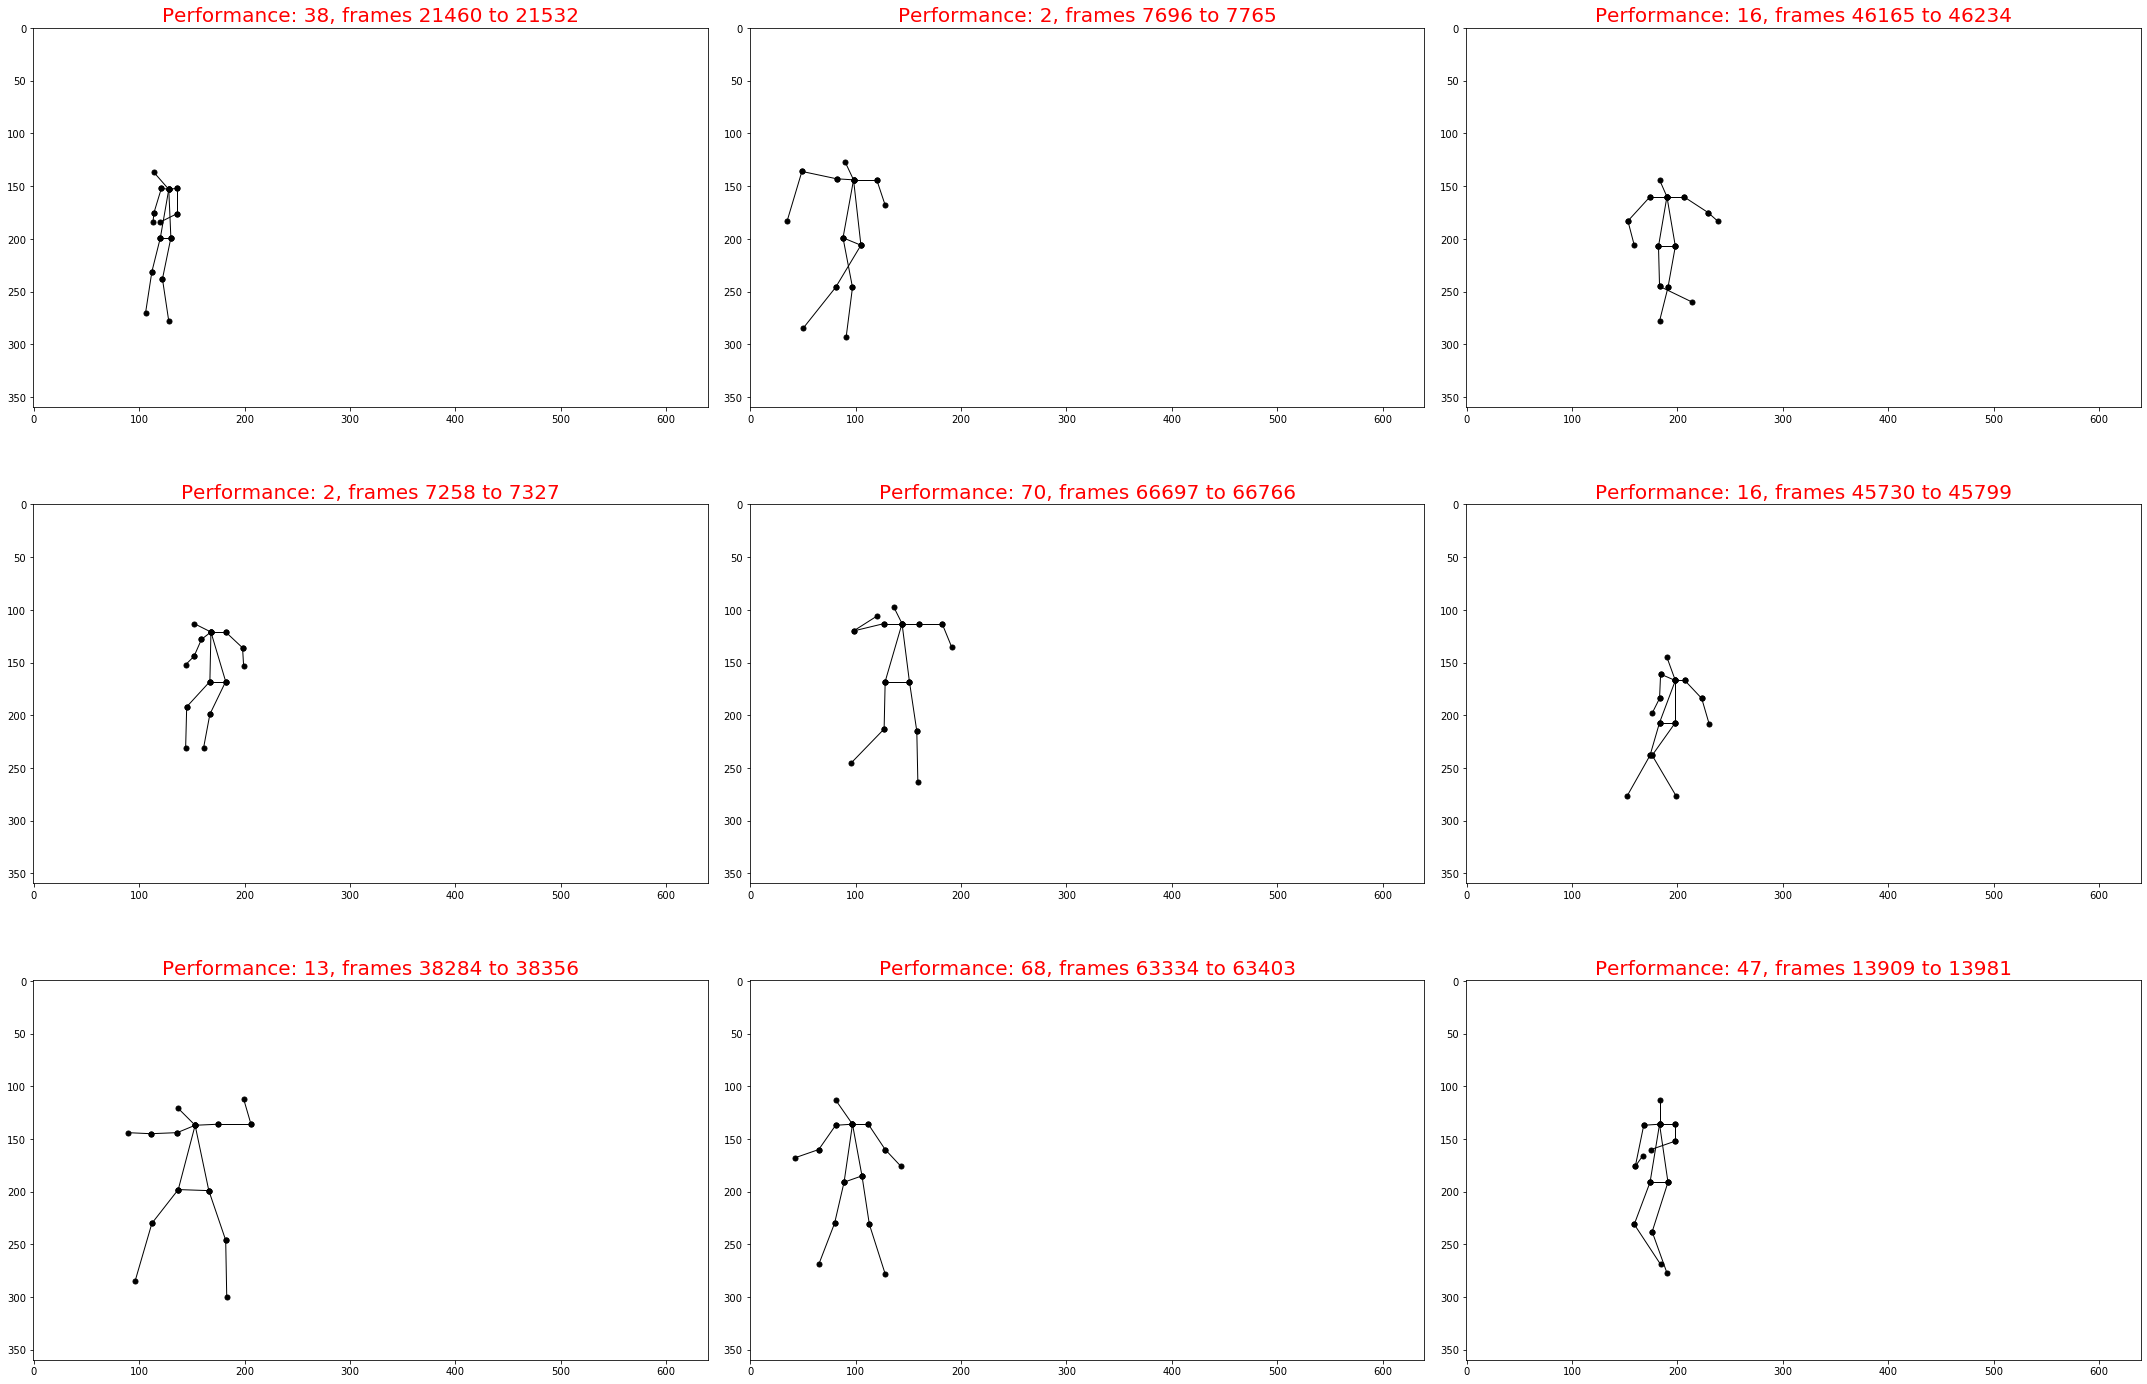

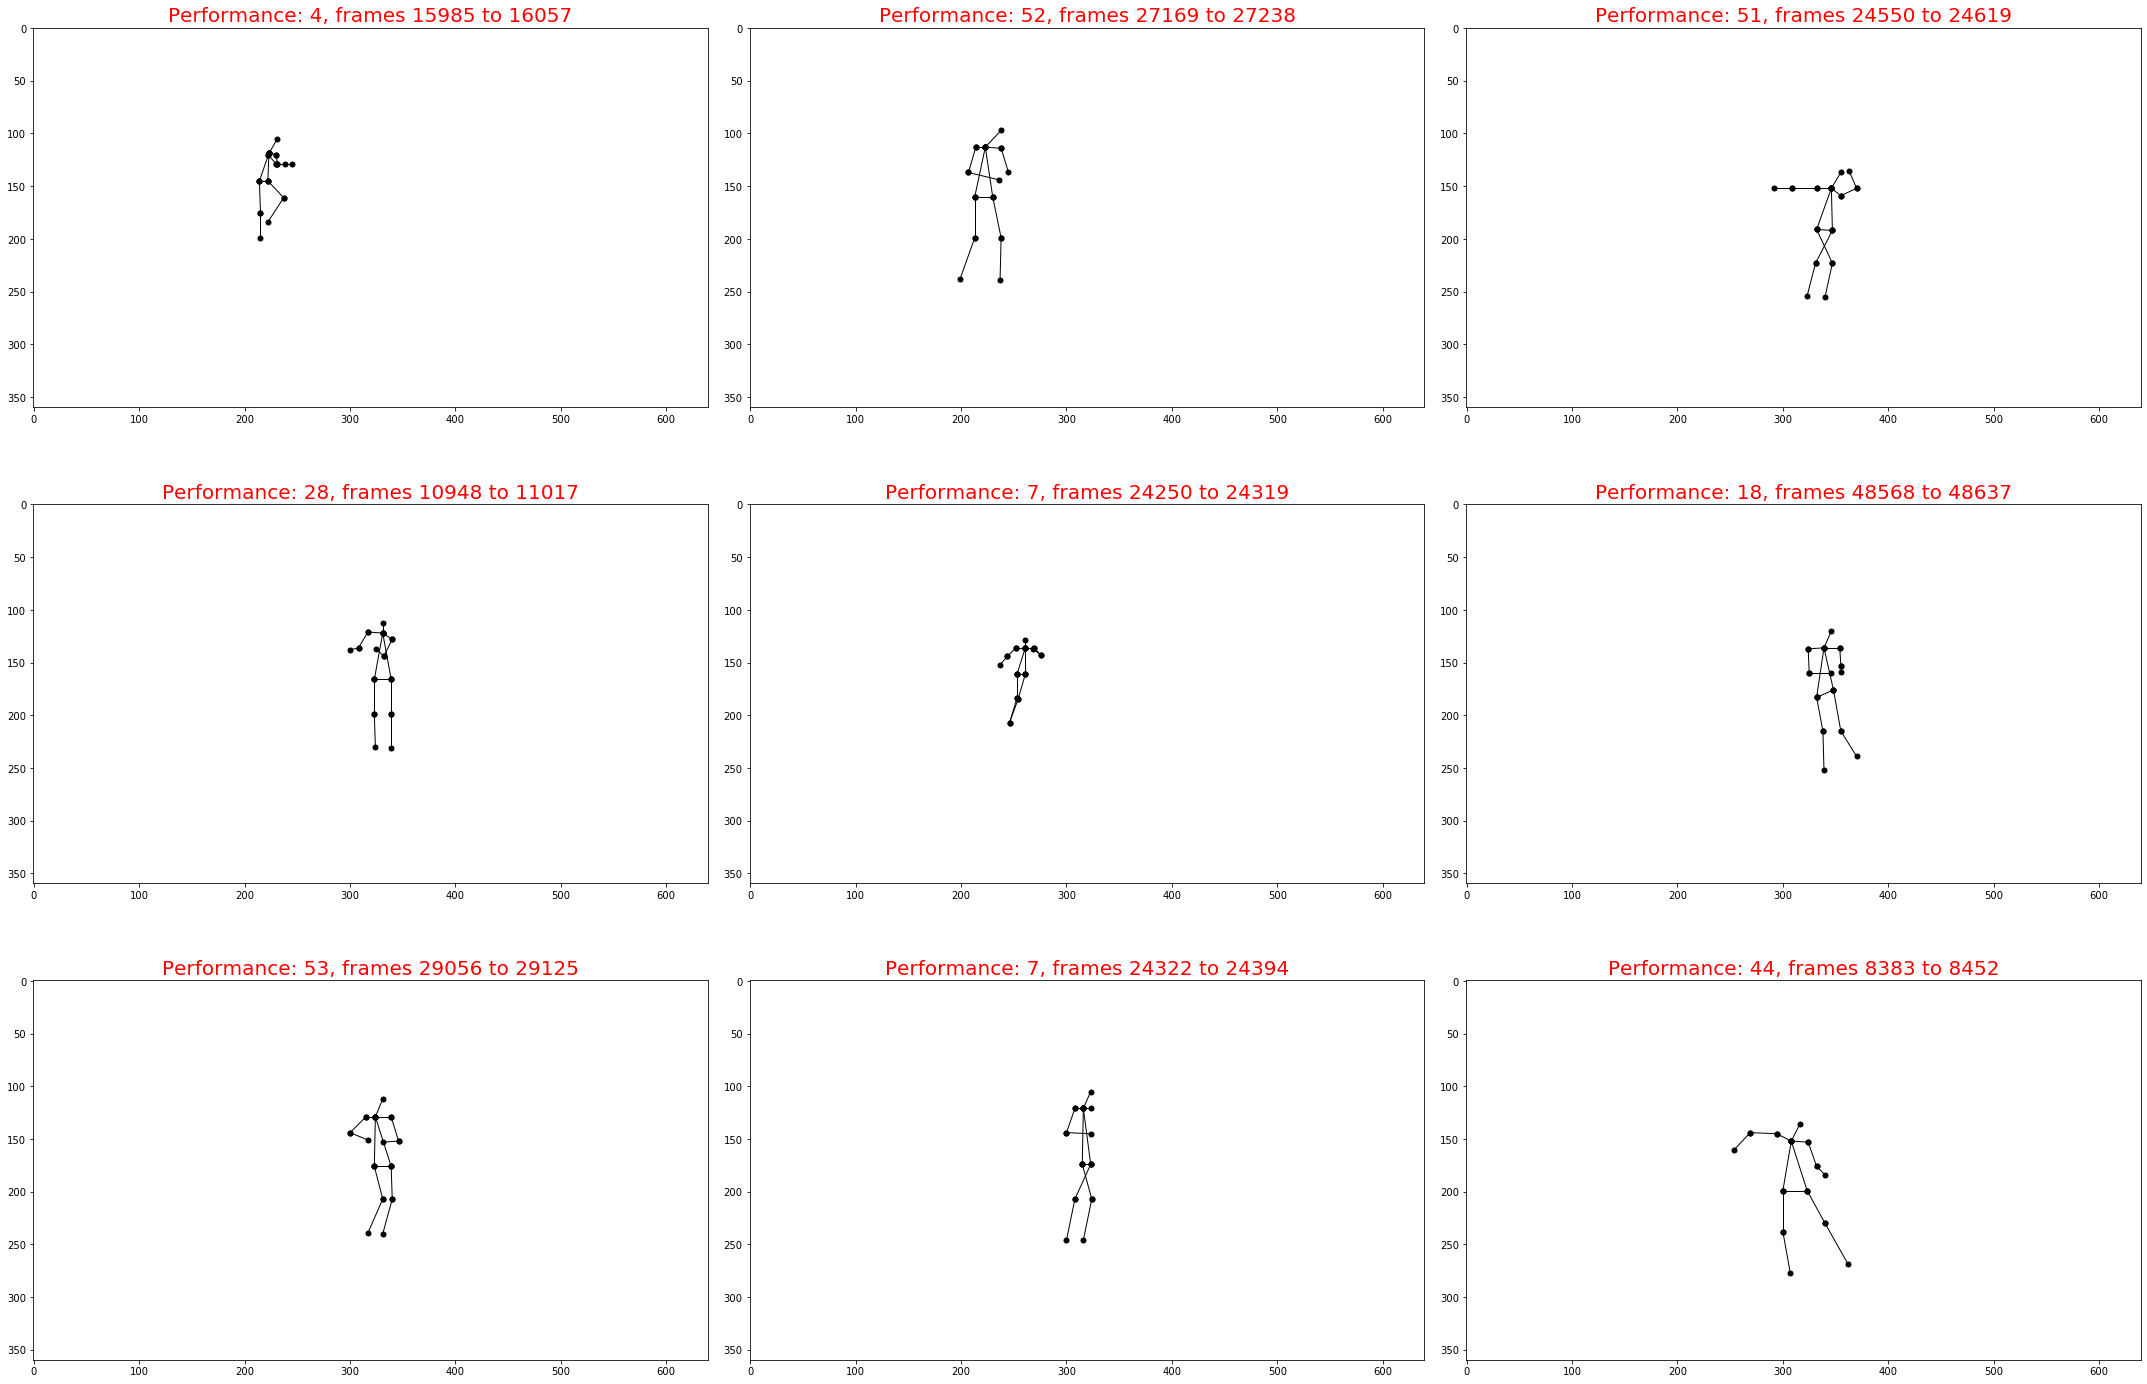

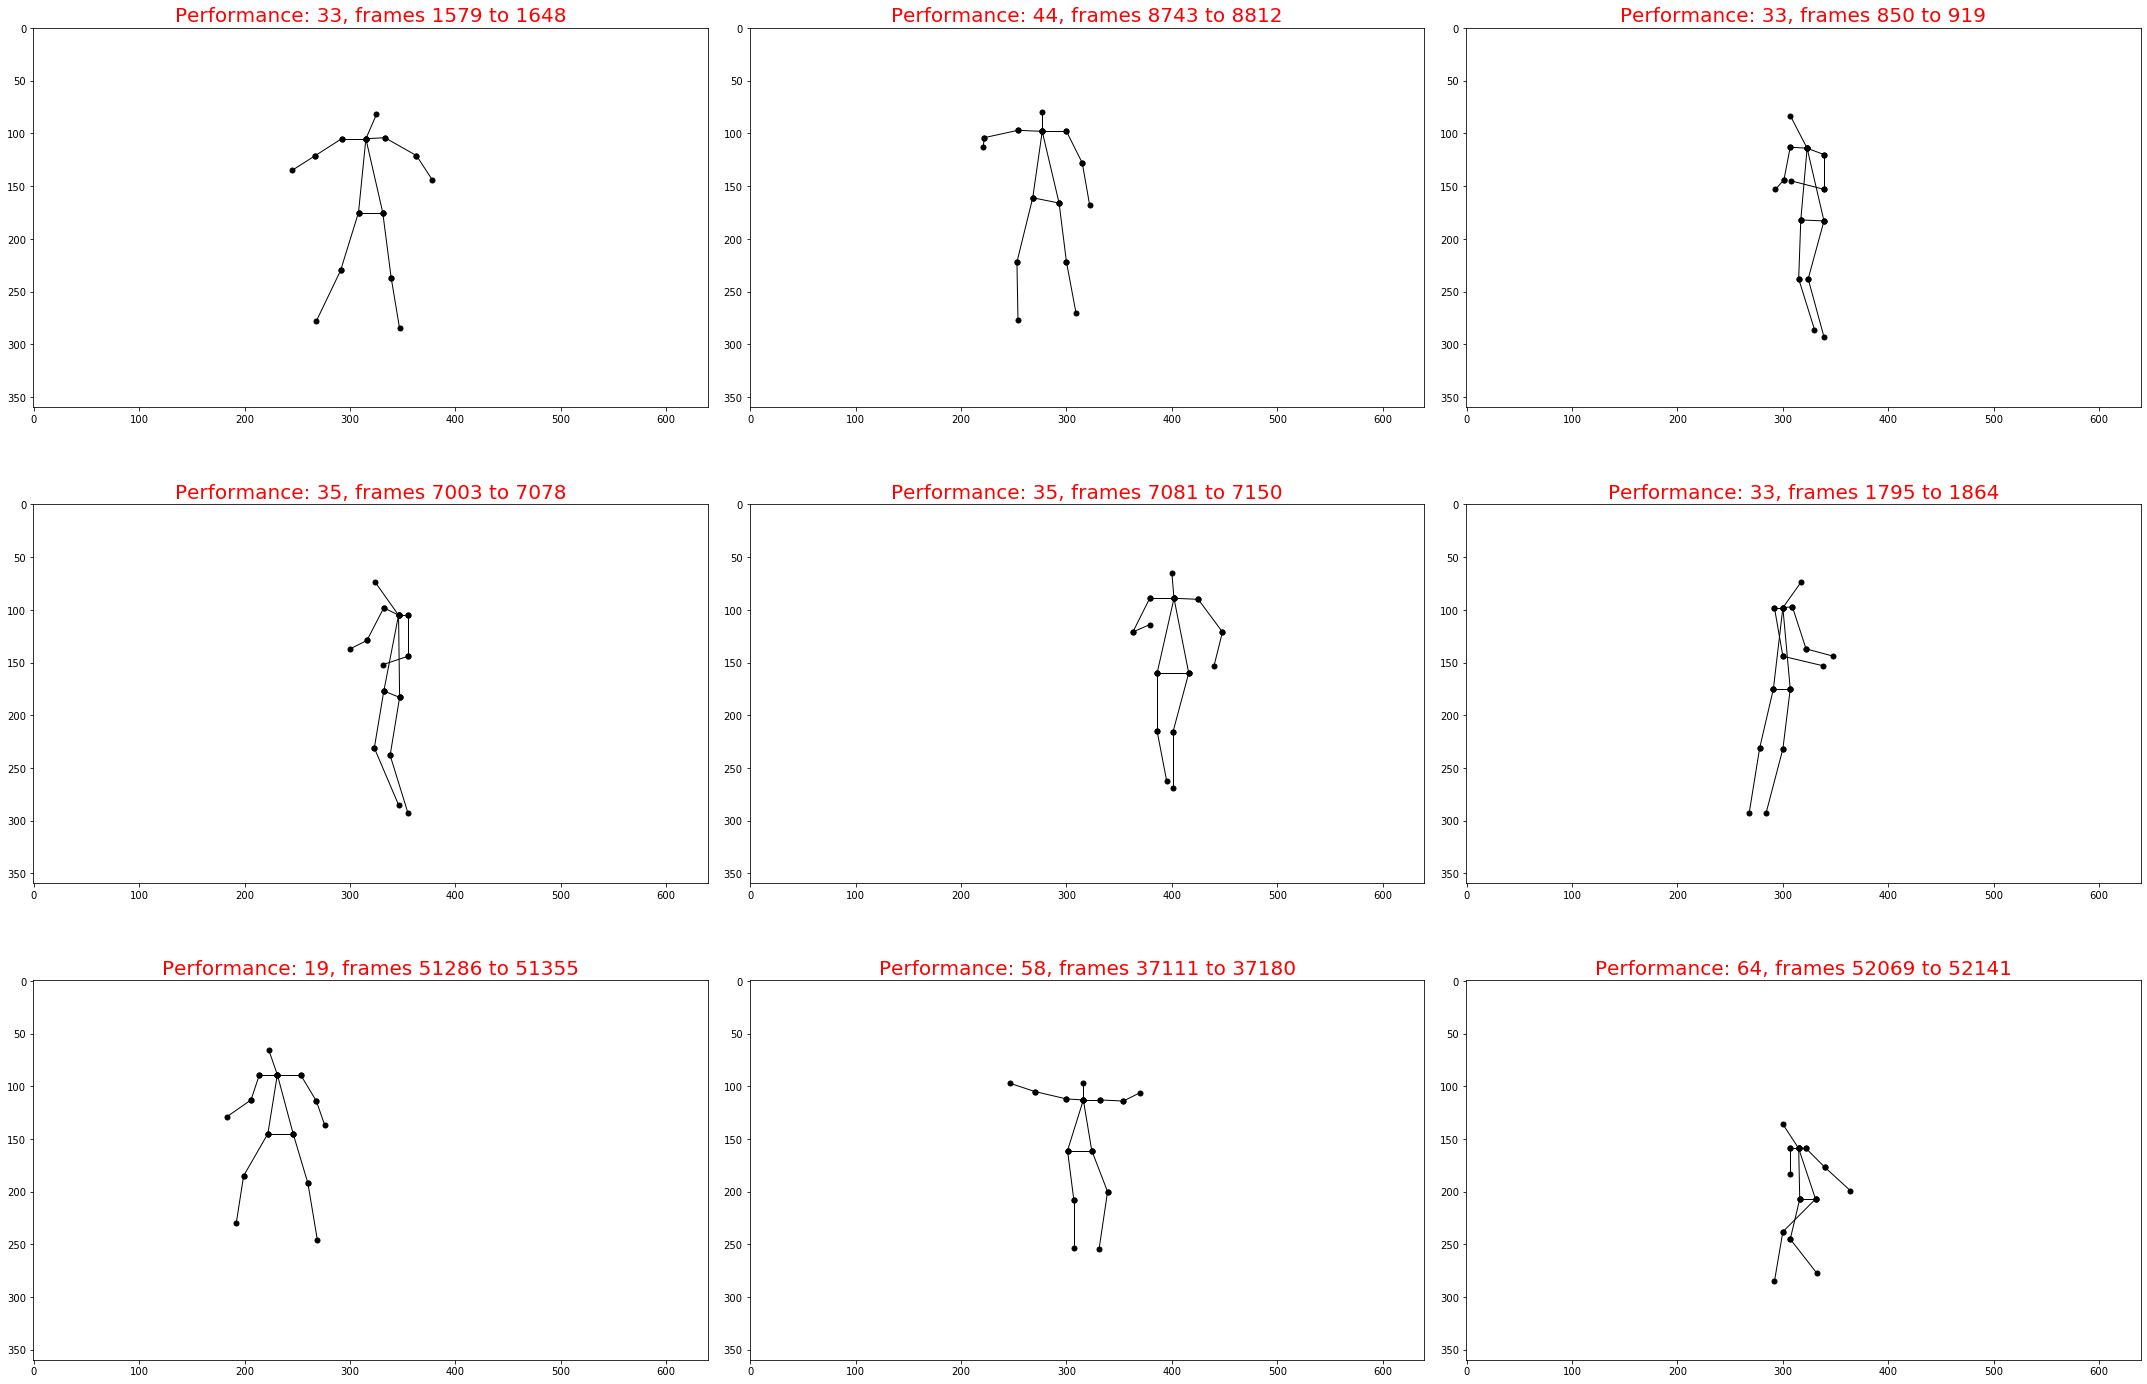

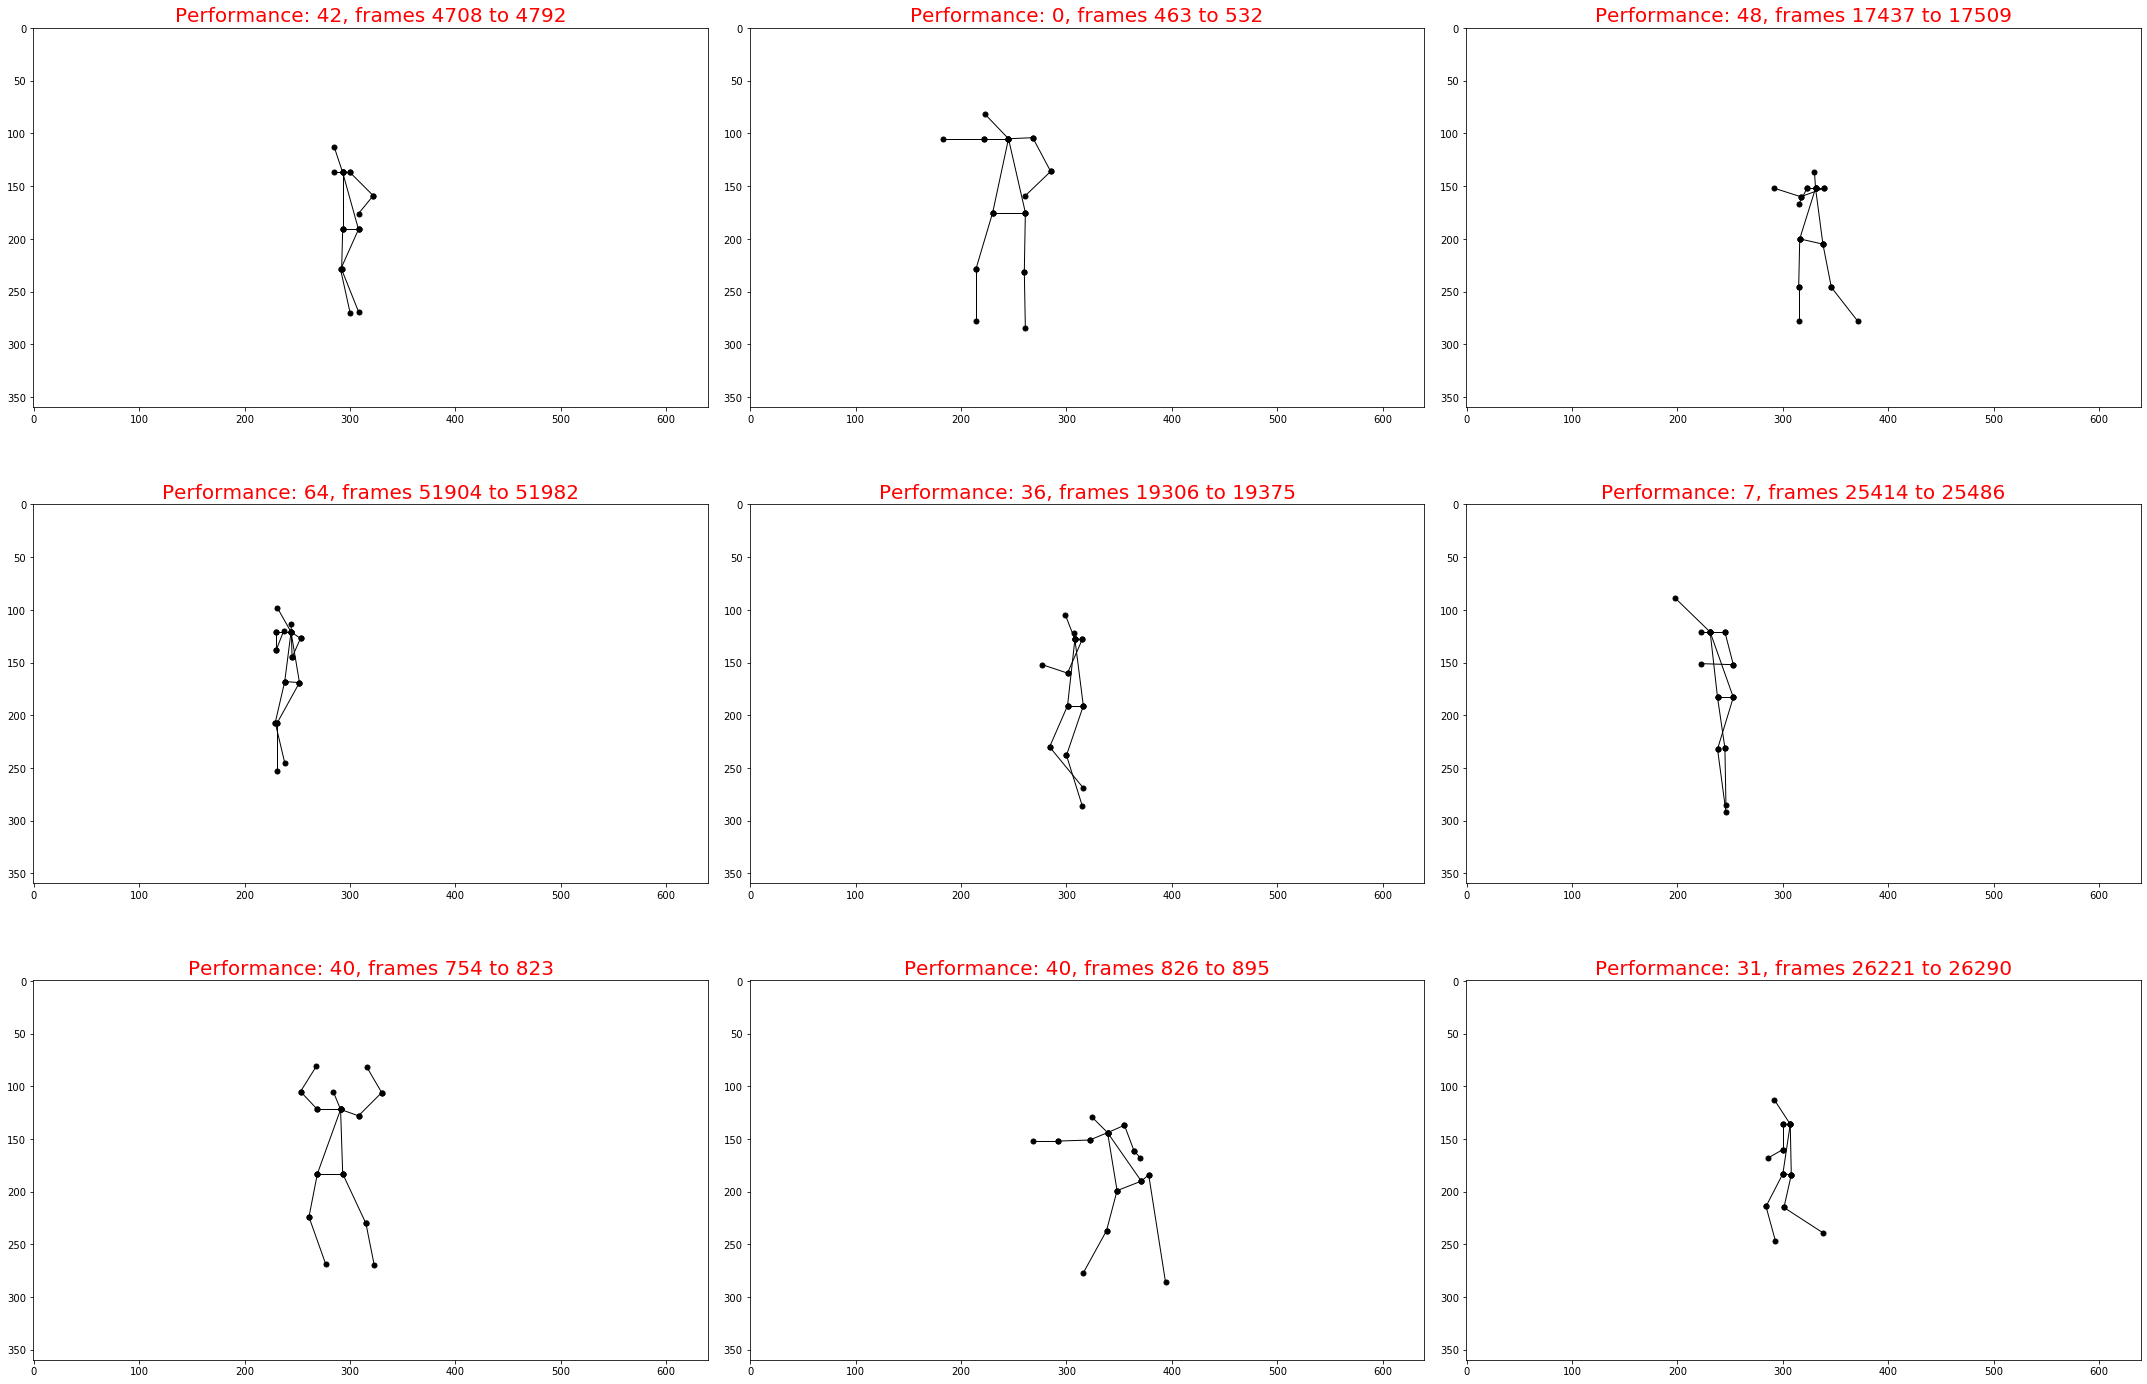

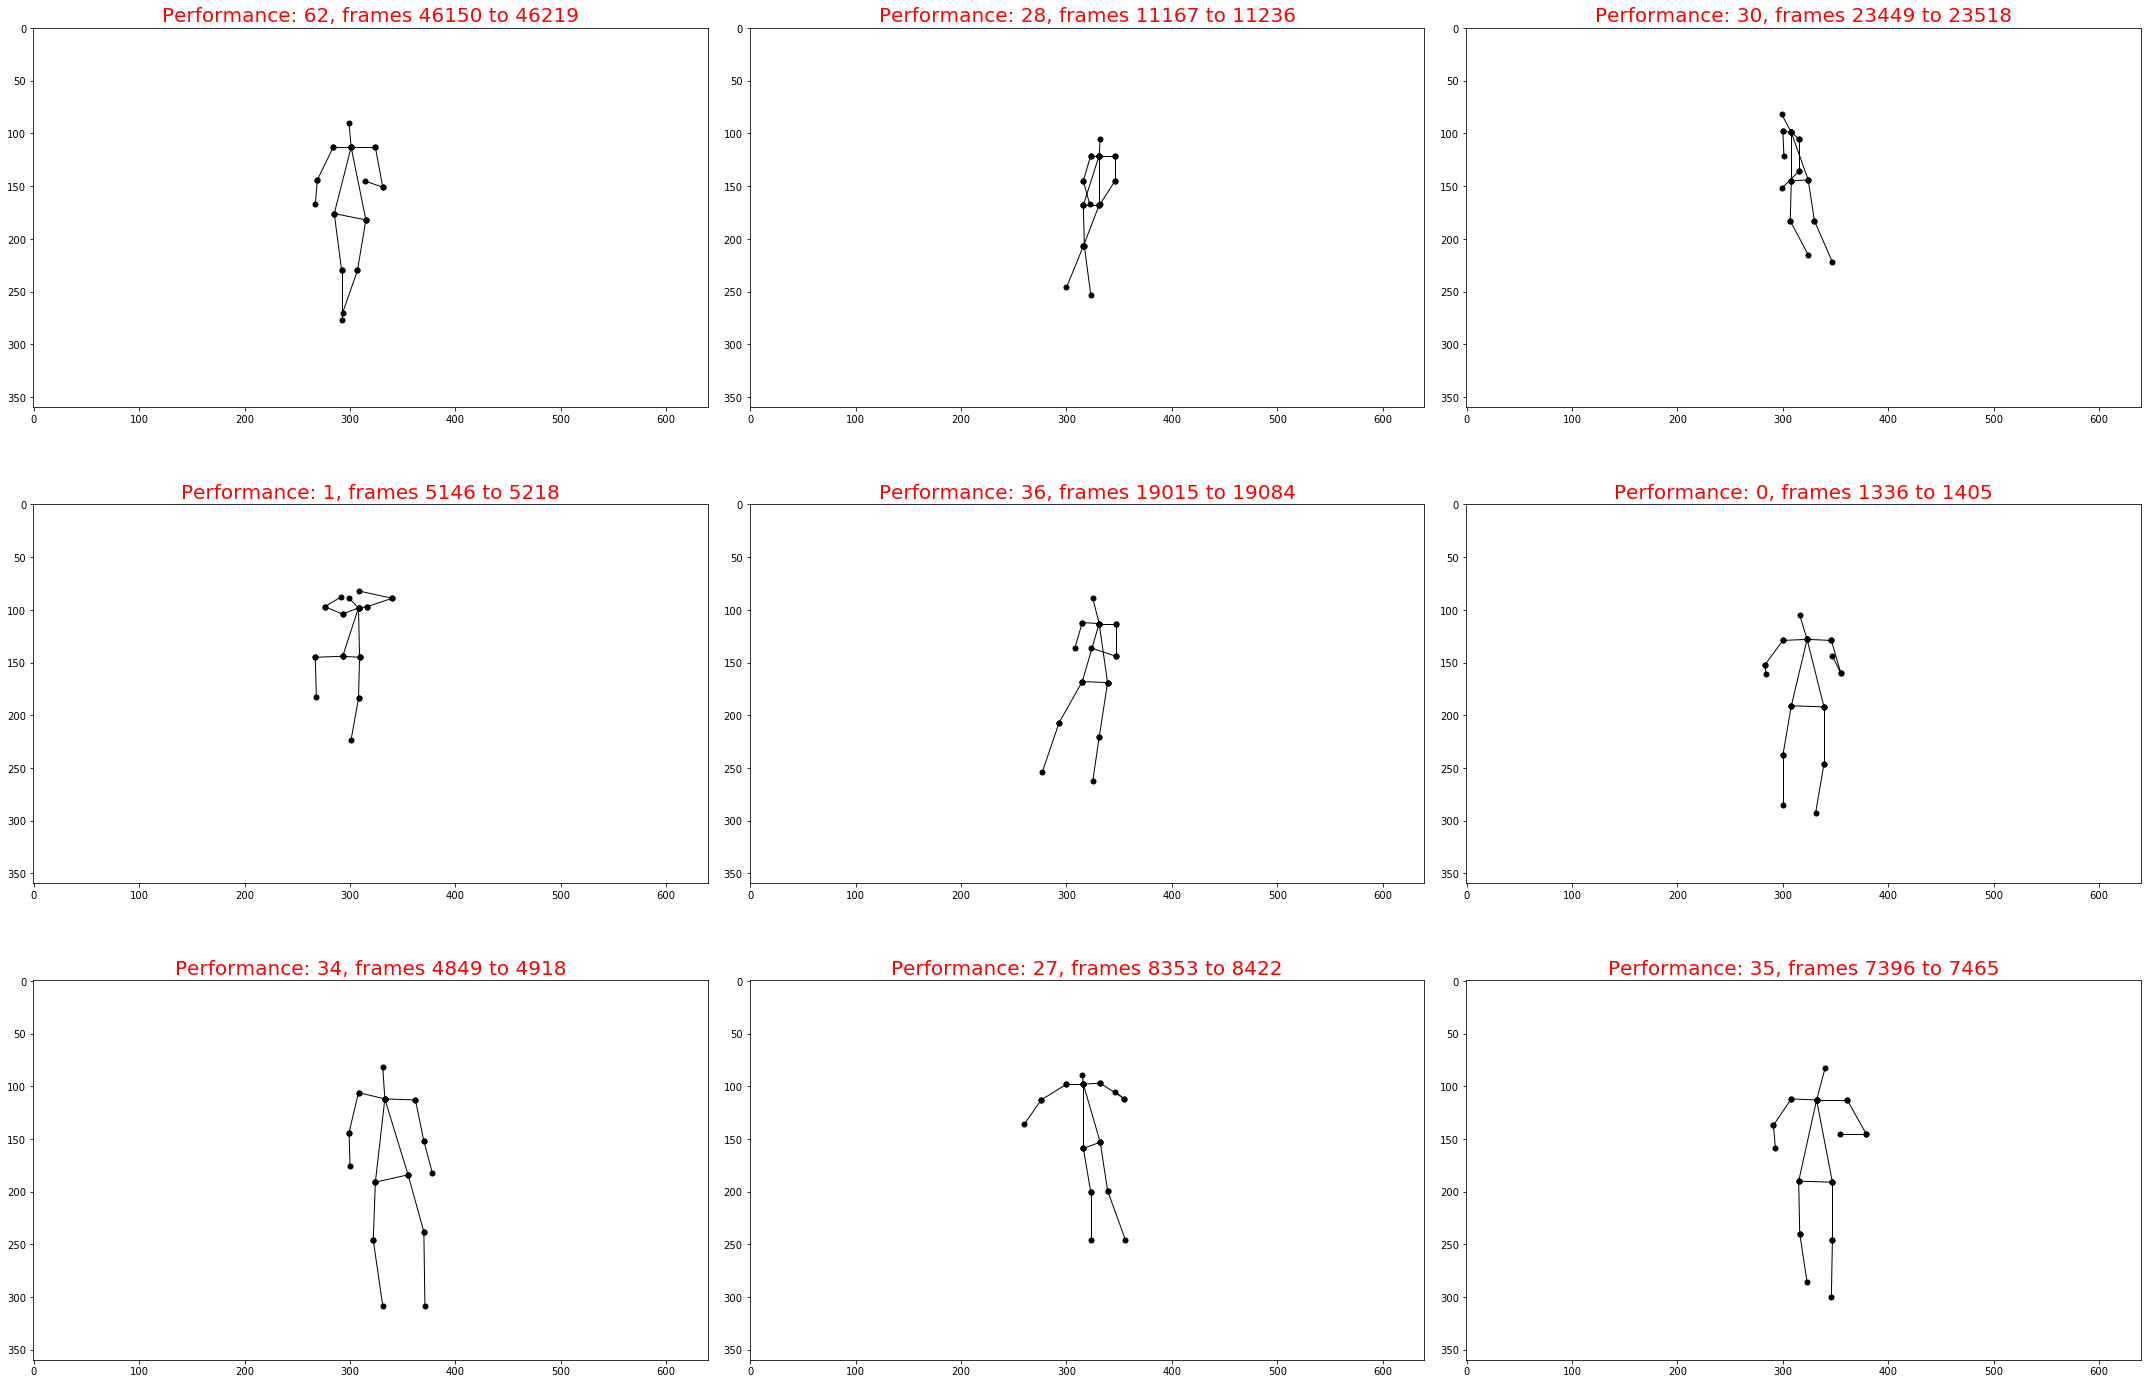

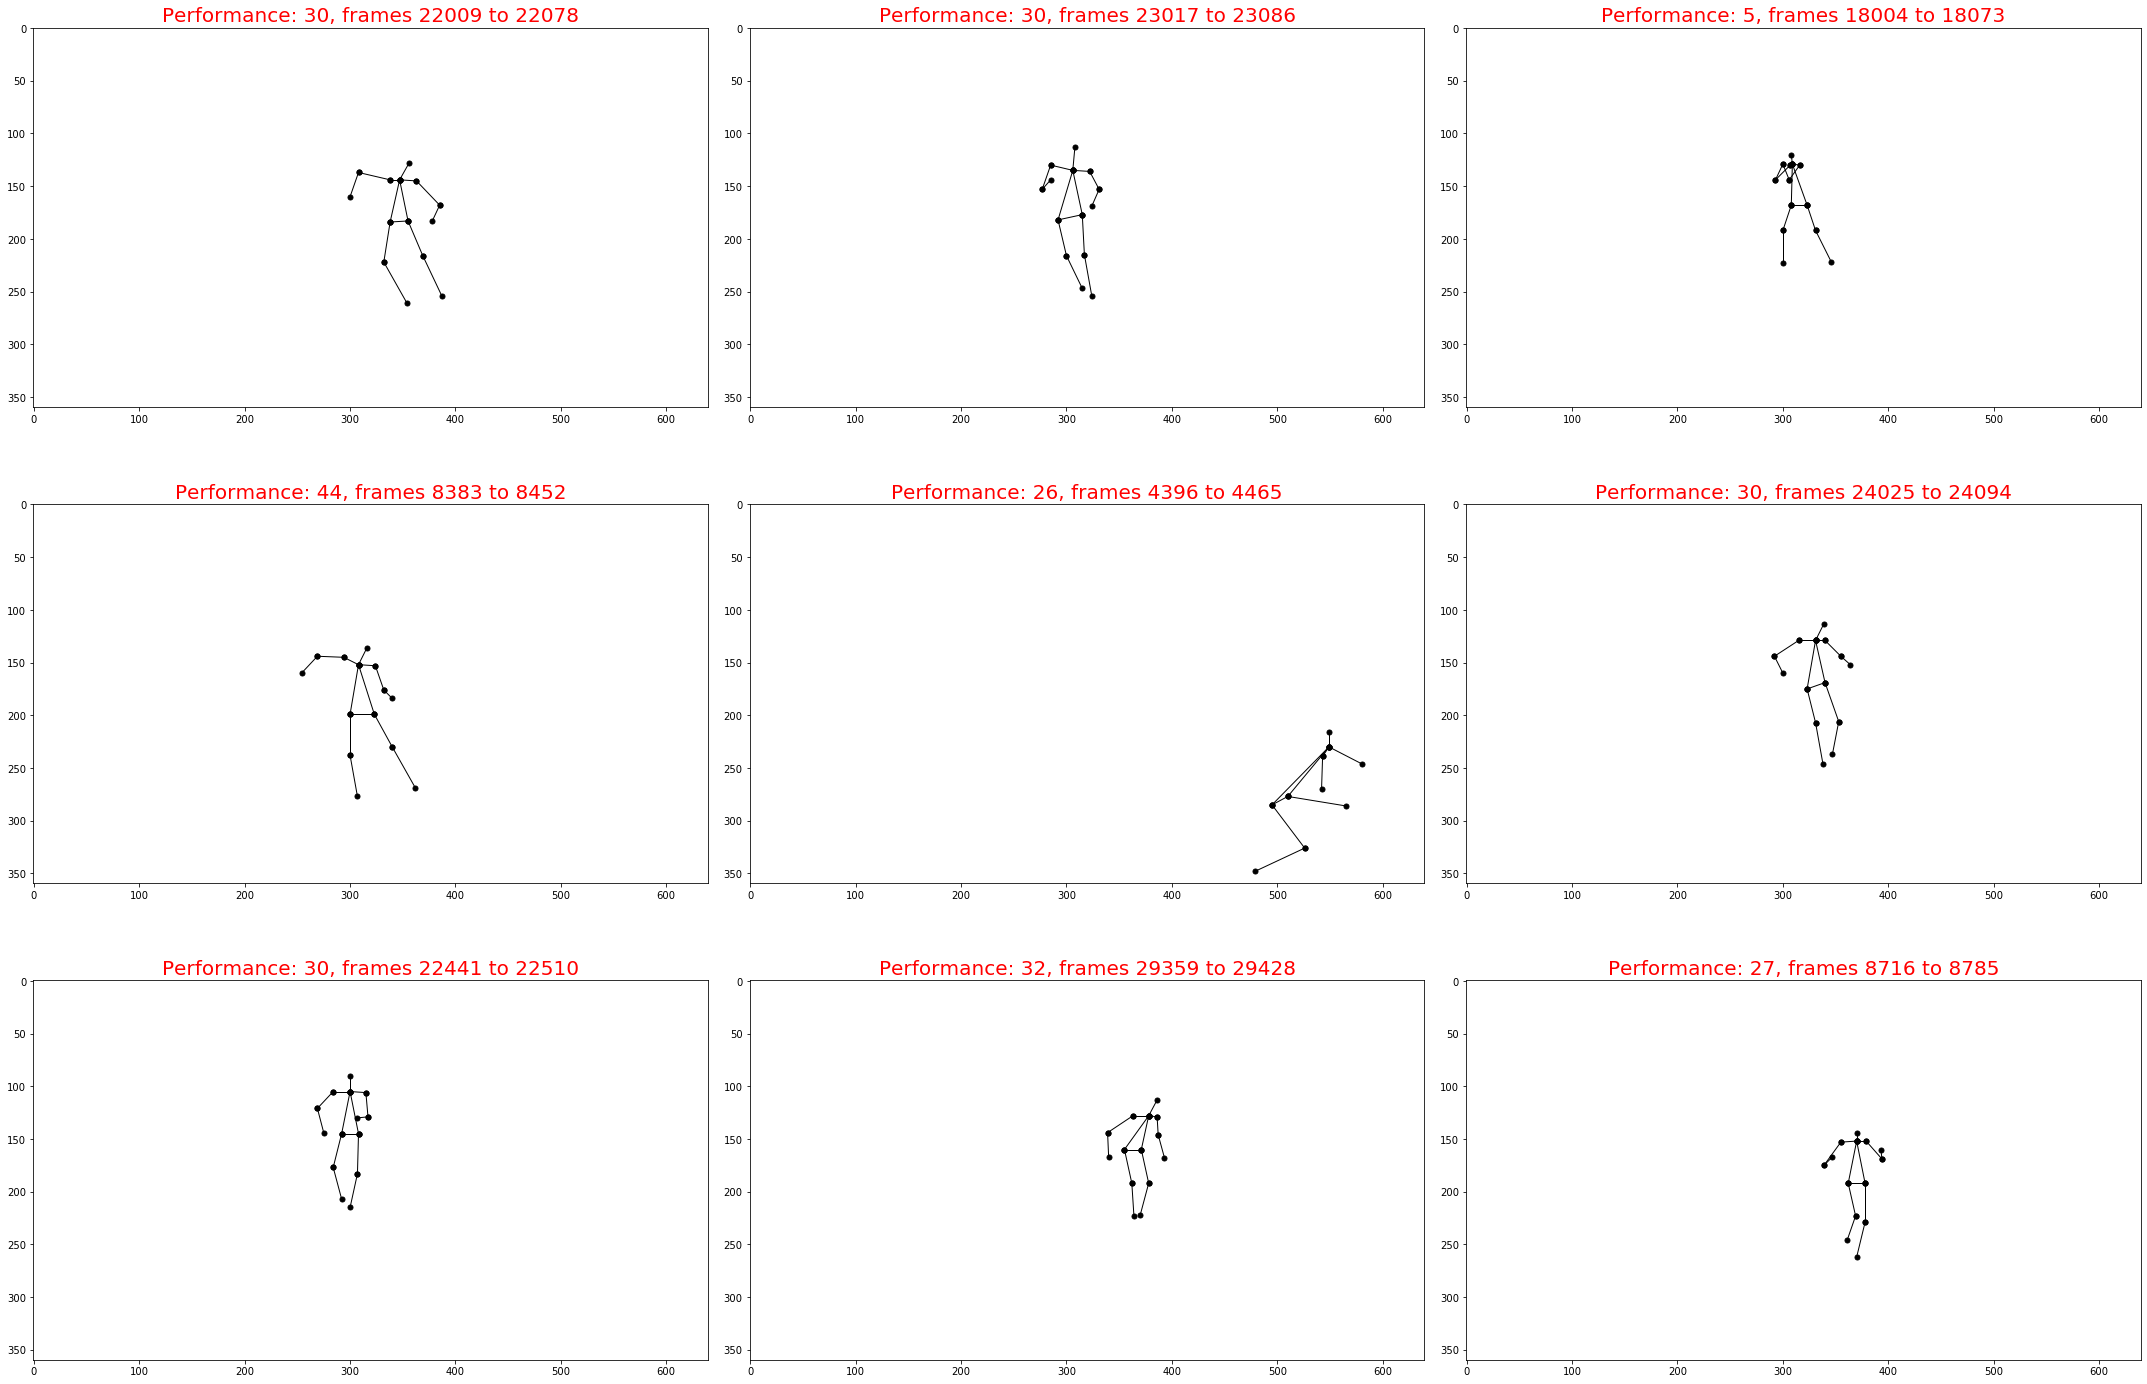

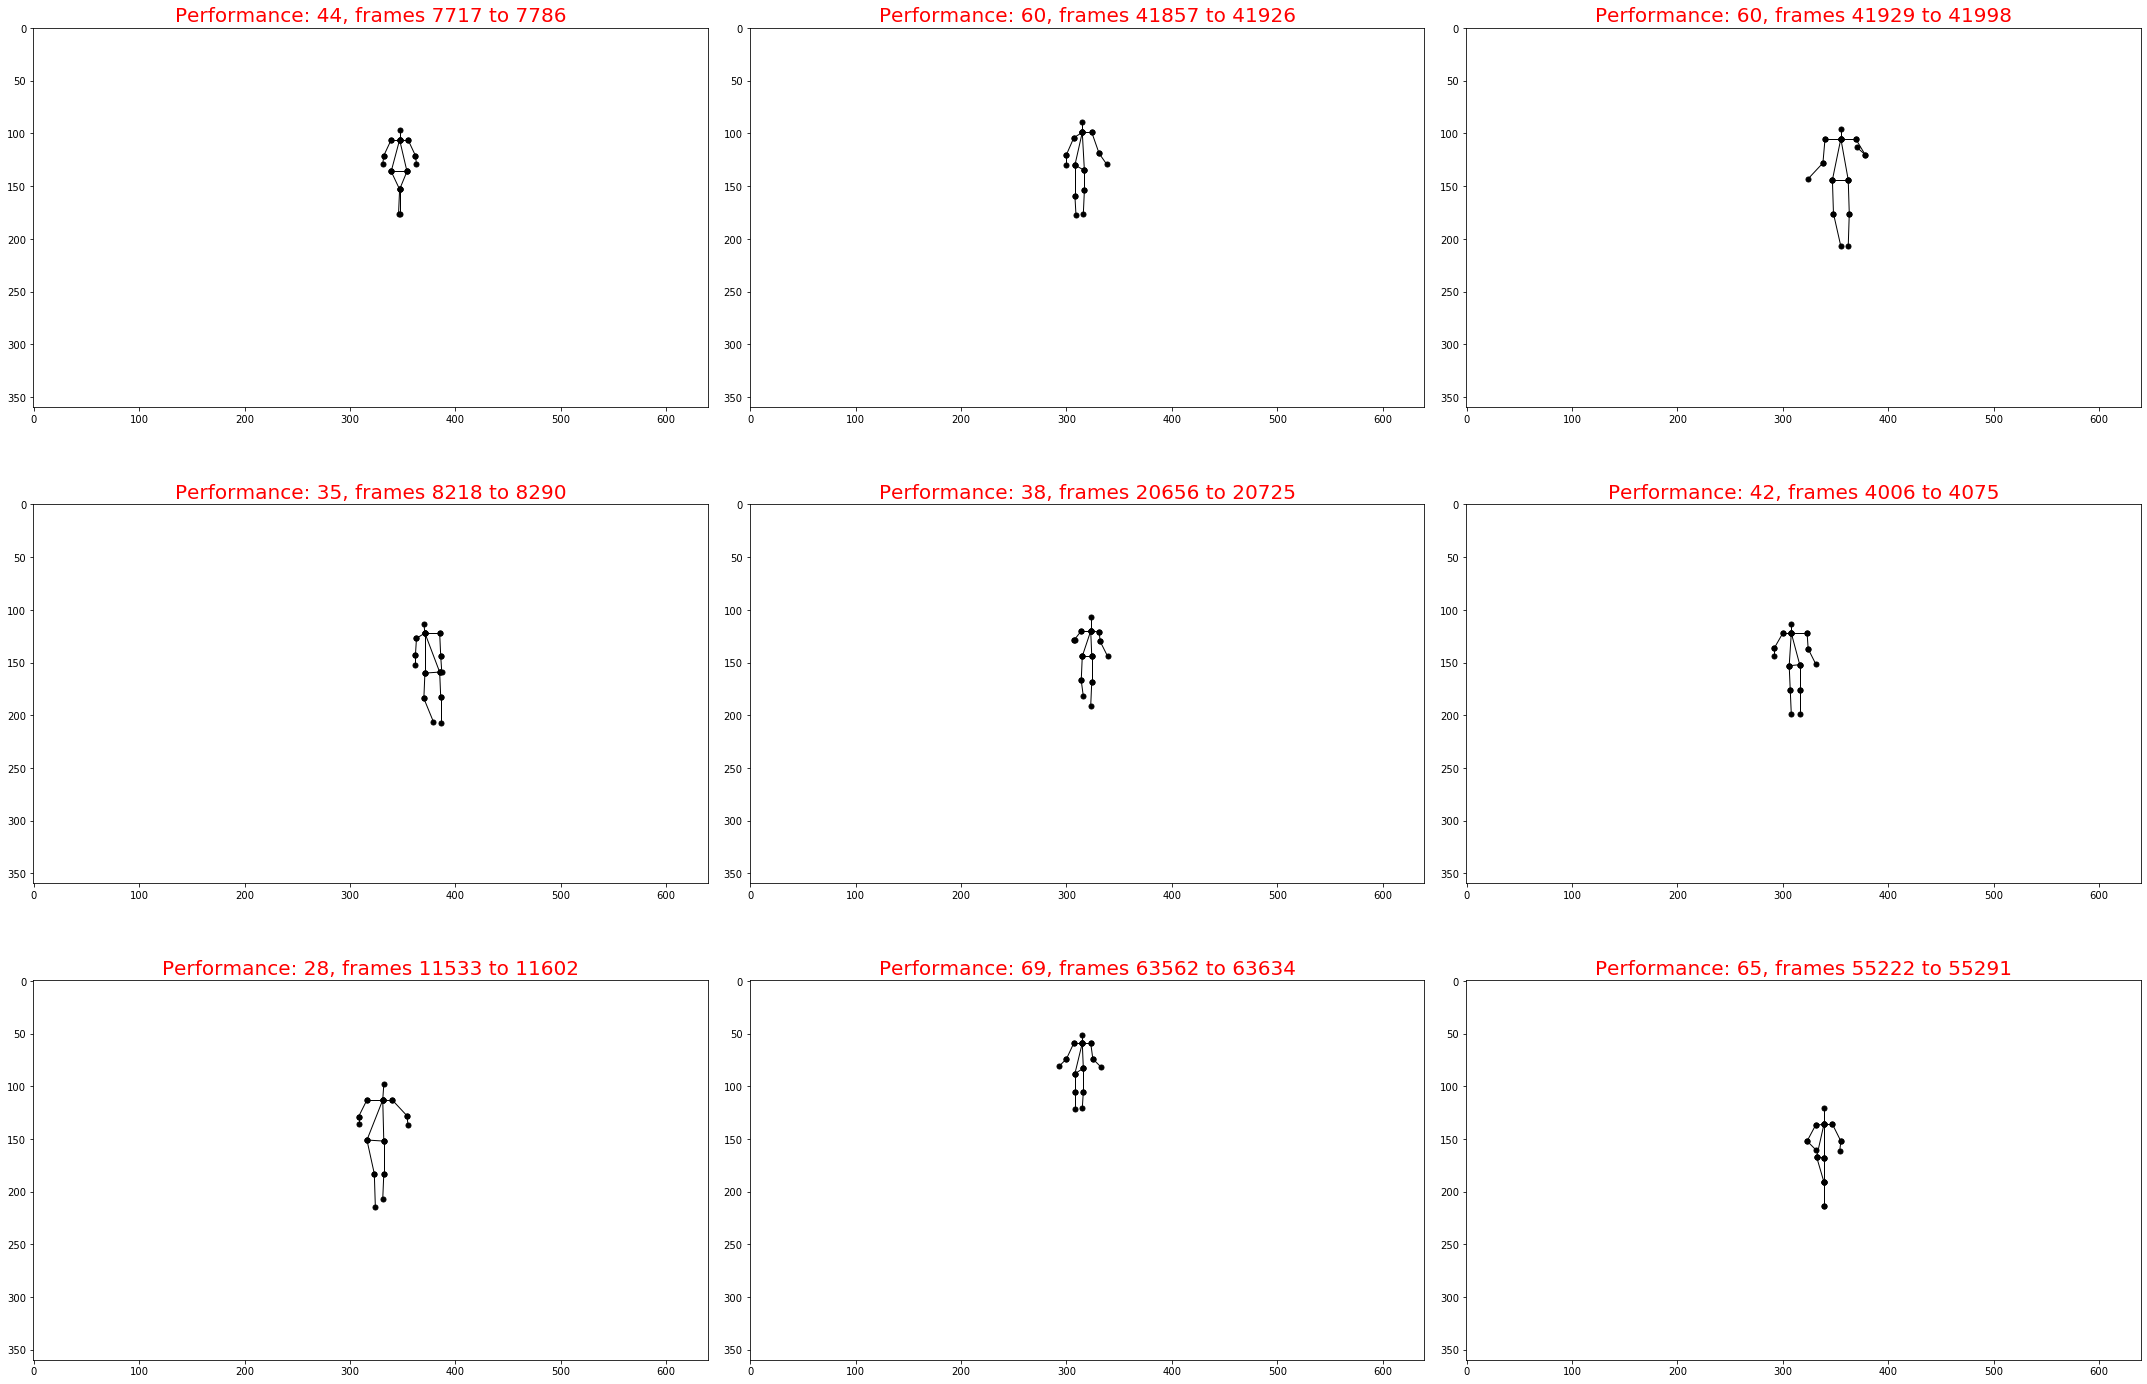

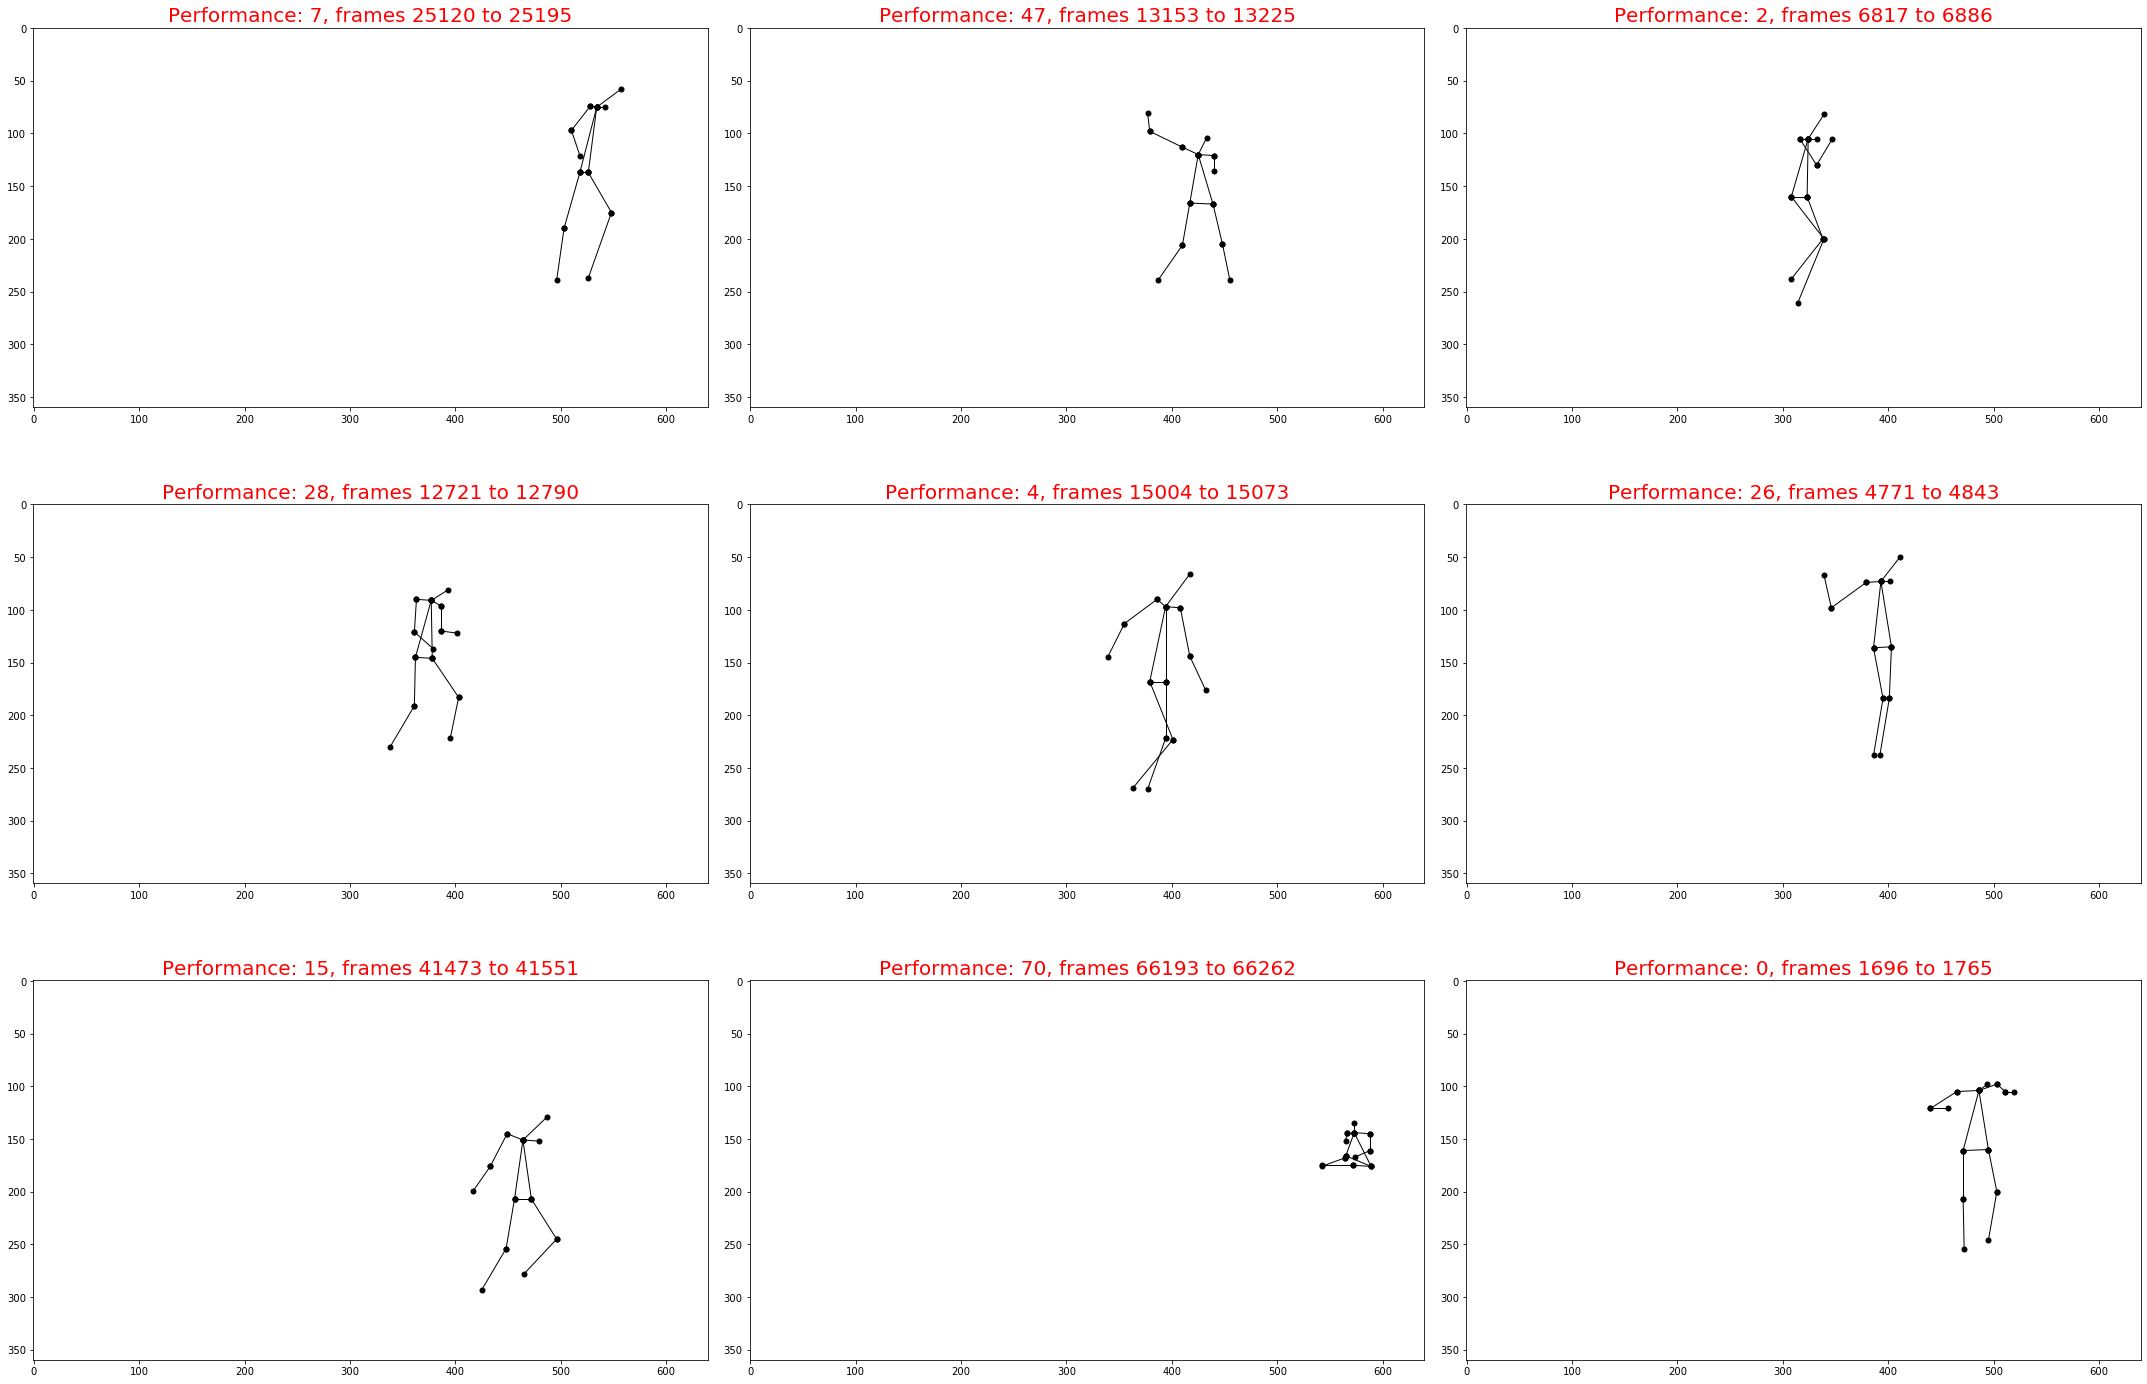

In [24]:
for i in range(1, 13):
    a = simClips(clips_dr, clips)
    sim_clips = a.getSimilarN_Poses(dist_metric="cosine") #sim_clips is a tuple (sim_meta and sim_data)
    plot_salsa_grid(sim_clips, "_f_lsa_cos_30_"+str(i))
    clips_vid = "../data/viz/full_lsa_cos_30_" + str(i)
    frames_for_clips = list(sim_clips[0][:,3:])
    frames_for_clips = [[f[0], f[1], f[1]+24*EVAL_TIME] for f in frames_for_clips]

    sim_clip_images = getSimilarVideoClipImages(frames_for_clips)
    similar9ClipsVideo(sim_clip_images, clips_vid)

In [77]:
clips[clips['vidFile']=="4nHElVbT3HY.mp4"][clips['startFrame']>60800]

//anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,idx,perfIdx,gender,vidFile,startFrame,endFrame,0,1,2,3,...,854,855,856,857,858,859,860,861,862,863
453,453,22,M,4nHElVbT3HY.mp4,60841,60910,0.665625,0.422222,0.651563,0.444444,...,0.418750,0.750000,-0.001563,-0.002778,0.395313,0.269444,-0.001563,-0.002778,0.407813,0.272222
454,454,22,M,4nHElVbT3HY.mp4,60913,60988,0.409375,0.294444,0.384375,0.336111,...,0.260937,0.750000,-0.001563,-0.002778,-0.001563,-0.002778,0.298438,0.291667,-0.001563,-0.002778
455,455,22,M,4nHElVbT3HY.mp4,60991,61081,0.296875,0.294444,0.273438,0.338889,...,0.212500,0.816667,0.151563,0.186111,0.164062,0.202778,-0.001563,-0.002778,0.176563,0.205556
456,456,22,M,4nHElVbT3HY.mp4,61084,61153,0.165625,0.205556,0.187500,0.272222,...,0.418750,0.769444,0.335938,0.144444,0.348438,0.141667,0.321875,0.161111,-0.001563,-0.002778
457,457,22,M,4nHElVbT3HY.mp4,61156,61225,0.346875,0.161111,0.334375,0.247222,...,0.735938,0.855556,0.604688,0.161111,0.617188,0.161111,-0.001563,-0.002778,0.639063,0.163889
458,458,22,M,4nHElVbT3HY.mp4,61228,61297,0.651563,0.202778,0.664062,0.291667,...,0.603125,0.725000,0.590625,0.250000,0.603125,0.250000,0.578125,0.230556,0.614063,0.230556
459,459,23,M,4nHElVbT3HY.mp4,61666,61750,0.285938,0.358333,0.273438,0.380556,...,0.446875,0.833333,0.431250,0.505556,0.434375,0.491667,-0.001563,-0.002778,0.445312,0.511111
460,460,23,M,4nHElVbT3HY.mp4,61753,61822,0.420313,0.511111,0.431250,0.575000,...,0.579688,0.772222,0.542188,0.355556,0.554688,0.355556,0.531250,0.336111,0.565625,0.336111
461,461,23,M,4nHElVbT3HY.mp4,61825,61894,0.542188,0.355556,0.551563,0.377778,...,0.639063,0.622222,0.614063,0.202778,0.615625,0.183333,0.592187,0.202778,-0.001563,-0.002778
462,462,23,M,4nHElVbT3HY.mp4,61897,61966,0.615625,0.202778,0.603125,0.227778,...,0.529687,0.616667,0.492188,0.183333,0.504688,0.183333,0.481250,0.183333,0.507812,0.180556


In [44]:
count_frames = [(len(perf), perf[0], perf[-1]) for perf in frame_data_by_dancer]#vids_by_performace
[f"Perf {i} in video {vids_by_performace[i]} has {count_frames[i]} frames" for i in range(0, len(count_frames))]

['Perf 0 in video 4nHElVbT3HY.mp4 has (749, 25, 2302) frames',
 'Perf 1 in video 4nHElVbT3HY.mp4 has (690, 3361, 5566) frames',
 'Perf 2 in video 4nHElVbT3HY.mp4 has (653, 6601, 8590) frames',
 'Perf 3 in video 4nHElVbT3HY.mp4 has (1003, 9889, 12958) frames',
 'Perf 4 in video 4nHElVbT3HY.mp4 has (854, 14065, 16678) frames',
 'Perf 5 in video 4nHElVbT3HY.mp4 has (629, 17713, 19678) frames',
 'Perf 6 in video 4nHElVbT3HY.mp4 has (575, 20929, 22798) frames',
 'Perf 7 in video 4nHElVbT3HY.mp4 has (809, 23812, 26278) frames',
 'Perf 8 in video 4nHElVbT3HY.mp4 has (22, 27373, 27460) frames',
 'Perf 9 in video 4nHElVbT3HY.mp4 has (766, 27562, 29926) frames',
 'Perf 10 in video 4nHElVbT3HY.mp4 has (1, 31123, 31123) frames',
 'Perf 11 in video 4nHElVbT3HY.mp4 has (619, 31198, 33118) frames',
 'Perf 12 in video 4nHElVbT3HY.mp4 has (47, 36961, 37099) frames',
 'Perf 13 in video 4nHElVbT3HY.mp4 has (699, 37261, 39478) frames',
 'Perf 14 in video 4nHElVbT3HY.mp4 has (78, 40321, 40558) frames',
 'P